### Capstone Project - Wine Quality Dataset - Nitin Pandey - Skillslash_FAIML_WDE_JAN Batch

## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

## Assumptions for EDA by observing the datset

In [2]:
#Assumptions / Observations after acquiring domain knowledge-

#Assuming value of 6-8 as good quality

#1. Higher fixed acidity above 7 gives the good quality of wine
#2. Volatile acidity lesser than 0.5 gives the good quality
#3. Citric acid value less than 0.5 gives the good quality
#4. Residual sugar above 1.8 gives the good quality
#5. As density increases quality of wine decreases
#6. ph value in range 3.2 - 3.4 gives good quality
#7. Sulphates value in the range of 0.47 - 0.75 gives the good quality of wine
#8. Sulphates increases as Total sulpfur increases
#9. Alcohol content between 9-10.5 gives good quality of wine
#10. Higher total sulfur dioxide/free sulfur dioxide content shows an increasing relationship with alcohol content
#11. Less chlorides give good quality of wine
#12. As chlorides increases density increases, hence quality decreases
#13. Higher total sulfur concentration reduces quality, moderate concetration gives good quality



## Importing Dataset

In [3]:
df = pd.read_csv("QualityPrediction.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
df.sample(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
127,8.1,1.330,0.00,1.8,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
63,7.0,0.735,0.05,2.0,0.081,13.0,54.0,0.99660,3.39,0.57,9.8,5
12,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.99430,3.58,0.52,9.9,5
1472,7.6,0.350,0.60,2.6,0.073,23.0,44.0,0.99656,3.38,0.79,11.1,6
1179,8.2,0.350,0.33,2.4,0.076,11.0,47.0,0.99599,3.27,0.81,11.0,6
1024,7.7,0.580,0.01,1.8,0.088,12.0,18.0,0.99568,3.32,0.56,10.5,7
1174,7.6,0.360,0.31,1.7,0.079,26.0,65.0,0.99716,3.46,0.62,9.5,6
52,6.6,0.500,0.04,2.1,0.068,6.0,14.0,0.99550,3.39,0.64,9.4,6
1417,7.3,0.340,0.33,2.5,0.064,21.0,37.0,0.99520,3.35,0.77,12.1,7
633,10.1,0.935,0.22,3.4,0.105,11.0,86.0,1.00100,3.43,0.64,11.3,4


## Exploratory Data Analysis

In [7]:
len(df[(df["fixed acidity"] >= 7) & (df["quality"] > 4)])/len(df)*100
# 78% of data set with fixed acidity greater than 6, gives quality > 4

77.79862414008755

In [8]:
len(df[(df["fixed acidity"] >= 7) & (df["quality"] > 5)])/len(df)*100
# 43% of data set with fixed acidity greater than or equal to 7, gives good quality

42.71419637273296

In [9]:
len(df[(df["fixed acidity"] < 7) & (df["quality"] > 5)])/len(df)*100
# 11% of data set with fixed acidity lesser than 7, gives good quality
#The above 2 codes validates 1st point of observation
#1. Higher fixed acidity above 7 gives the good quality of wine

10.756722951844903

In [10]:
len(df[(df["volatile acidity"] < 0.5) & (df["quality"] > 5)])/len(df)*100
# 31% of data set with volatile acidity lesser than 0.5, gives good quality

30.268918073796126

In [11]:
len(df[(df["volatile acidity"] >= 0.5) & (df["quality"] > 5)])/len(df)*100
# 24% of data set with volatile acidity greater than or equal to 0.5, gives good quality
#The above 2 codes validates 2nd point of observation
#2. Volatile acidity lesser than 0.5 gives the good quality

23.20200125078174

In [12]:
len(df[(df["citric acid"] < 0.5) & (df["quality"] > 5)])/len(df)*100
# 45% of data set with citric acid lesser than 0.5, gives good quality

44.777986241400875

In [13]:
len(df[(df["citric acid"] >= 0.5) & (df["quality"] > 5)])/len(df)*100
# 9% of data set with citric acid greatre than or equal to 0.5, gives good quality
#The above 2 codes validates 3rd point of observation
#3. Citric acid value less than 0.5 gives the good quality

8.692933083176985

In [14]:
len(df[(df["residual sugar"] > 1.8) & (df["quality"] > 5)])/len(df)*100
# 43% of data set with residual sugar greater than 1.8, gives good quality

42.40150093808631

In [15]:
len(df[(df["residual sugar"] <= 1.8) & (df["quality"] > 5)])/len(df)*100
# 11% of data set with residual sugar lesser than or equal to 1.8, gives good quality
#The above 2 queries validates 4th point of observation
#4. Residual sugar above 1.8 gives the good quality

11.069418386491558

In [16]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [17]:
df1 = df[df["quality"] > 5]
df1
#855 data sets out of 1599 rows have quality greater than 5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [18]:
df1["density"].describe()
#Good quality wine has a density range of 0.990070 to 1.003690
#Good quality wine has IQR of 0.0025 with mean value 0.996467

count    855.000000
mean       0.996467
std        0.002067
min        0.990070
25%        0.995185
50%        0.996400
75%        0.997685
max        1.003690
Name: density, dtype: float64

In [19]:
df2 = df[df["quality"] <= 5]
df2
#744 data sets out of 1599 rows have quality lesser than or equal to 5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


In [20]:
df2["density"].describe()
#Not Good quality wine has IQR of 0.00178 with mean value as 0.997068
#This means density has weakly negative correlation with quality
#The above 4 codes validates observation no. 5
#5. As density increases quality of wine decreases

count    744.000000
mean       0.997068
std        0.001598
min        0.992560
25%        0.996120
50%        0.996935
75%        0.997900
max        1.003150
Name: density, dtype: float64

In [21]:
df.pH.unique()

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 ])

In [22]:
len(df[(df["pH"] >= 3.2) & (df["pH"] <= 3.4) & (df["quality"] > 5)])/len(df)*100
# 30% of data set with pH between 3.2 and 3.4, gives good quality

29.580988117573483

In [23]:
len(df[(df["pH"] < 3.2) & (df["quality"] > 5)])/len(df)*100
# 11% of data set with pH less than 3.2, gives good quality

11.25703564727955

In [24]:
len(df[(df["pH"] > 3.4) & (df["quality"] > 5)])/len(df)*100
# 13% of data set with pH greater than 3.4, gives good quality
#The above 3 codes validates 6th observation
#6. ph value in range 3.2 - 3.4 gives good quality

12.632895559724828

In [25]:
len(df[(df["sulphates"] >= 0.47) & (df["sulphates"] <= 0.75) & (df["quality"] > 5)])/len(df)*100
# 36% of data set with sulphates between 0.47 and 0.75, gives good quality
#This validates 7th observation
#7. Sulphates value in the range of 0.47 - 0.75 gives the good quality of wine

36.898061288305186

In [26]:
df.sulphates.describe()

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

In [27]:
df["total sulfur dioxide"].describe()

count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64

In [28]:
df.sulphates.unique()

array([0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8 , 0.54, 0.52, 1.56,
       0.88, 0.93, 0.75, 1.28, 0.5 , 1.08, 0.53, 0.91, 0.63, 0.59, 0.55,
       0.66, 0.6 , 0.73, 0.48, 0.83, 0.51, 0.9 , 1.2 , 0.74, 0.64, 0.77,
       0.71, 0.62, 0.39, 0.79, 0.95, 0.82, 1.12, 1.14, 0.78, 1.95, 1.22,
       1.98, 0.61, 1.31, 0.69, 0.67, 0.7 , 0.49, 0.92, 2.  , 0.72, 1.59,
       0.33, 1.02, 0.97, 0.85, 0.43, 1.03, 0.86, 0.76, 1.61, 1.09, 0.84,
       0.96, 0.45, 1.26, 0.87, 0.81, 1.  , 1.36, 1.18, 0.89, 0.98, 1.13,
       1.04, 1.11, 0.99, 1.07, 0.44, 1.06, 1.05, 0.42, 1.17, 1.62, 0.94,
       1.34, 1.16, 1.1 , 0.4 , 1.15, 0.37, 1.33, 1.01])

In [29]:
len(df[(df["alcohol"] >= 9) & (df["alcohol"] <= 10.5) & (df["quality"] > 5)])/len(df)*100
# 23% of data set with alcohol between 9 and 10.5, gives good quality

22.76422764227642

In [30]:
len(df[(df["alcohol"] >= 9) & (df["quality"] > 5)])/len(df)*100
# 54% of data set with alcohol above 9, gives good quality

53.283302063789876

In [31]:
len(df[(df["alcohol"] >= 10.5) & (df["quality"] > 5)])/len(df)*100
# 33% of data set with alcohol above 10.5, gives good quality
#The above 2 codes contradicts range in observation no. 9 as 54% dataset with alcohol content greater than 9 gives good quality
#9. Alcohol content between 9-10.5 gives good quality of wine

32.70794246404002

In [32]:
df.chlorides.describe()

count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

In [33]:
len(df[(df["chlorides"] <= df["chlorides"].mean()) & (df["quality"] > 5)])/len(df)*100
#40% of dataset having chlorides lesser than its mean value shows good quality
#This validates observation no. 11
#11. Less chlorides give good quality of wine

40.08755472170106

In [34]:
df.isnull().sum()
#Dataset has no null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [35]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## Heatmap

<AxesSubplot:>

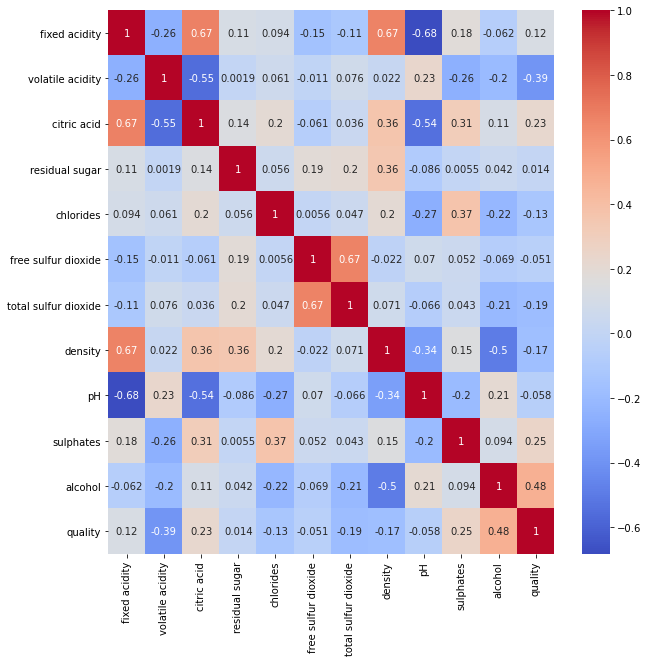

In [36]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', ax = ax)
#Strong positive correlations - 
    #citric acid and fixed acidity
    #density and fixed acidity
    #alcohol content and quality
#Moderate positive correlations - 
    #residual sugar and density
    #sulphates and chlorides
    #sulphates and citric acid
#Strong negative correlation -
    #fixed acidity and pH
    #citric acidity and pH
    #volatile acidity and citric acid
    #density and alcohol
#Moderate negatice correlation - 
    #fixed acidity and volatile acidity
    #sulphates and volatile acidity
    #Quality and volatile acidity
    #pH and density
    #Total sulfur dioxide and alcohol
    #Total sulfur dioxide and quality
    #Density and quality
    #Alcohol and chlorides

## Graphical Interpretations

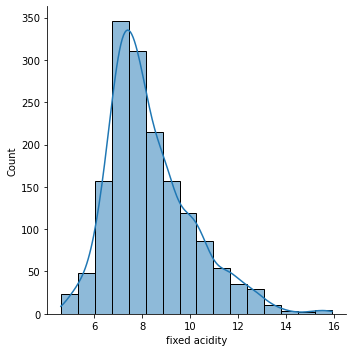

In [37]:
sns.displot(df["fixed acidity"], bins = 16, kde = True)
#Fixed acidity of 7 to 7.5 has higher counts 

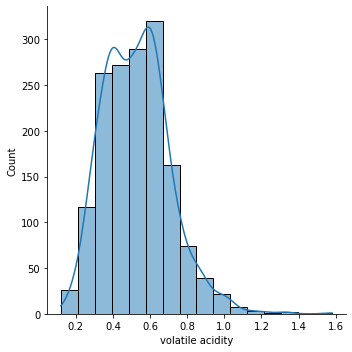

In [38]:
sns.displot(df["volatile acidity"], bins = 16, kde = True)
#Volatile acidity of 0.58 to 0.68 has higher counts and probability density function has has two different peaks at 0.4 and 0.58

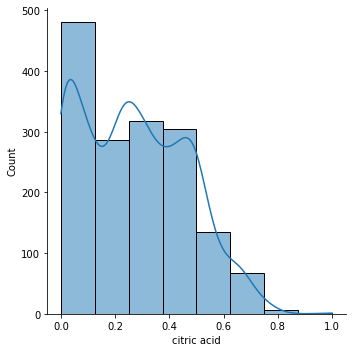

In [39]:
sns.displot(df["citric acid"], bins = 8, kde = True)
#citric acid between 0 to 0.12 has higher counts 

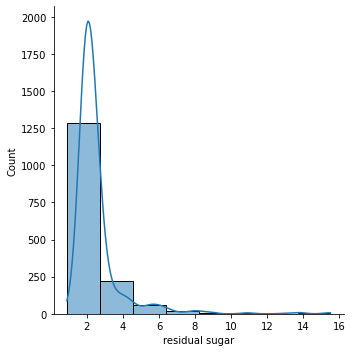

In [40]:
sns.displot(df["residual sugar"], bins = 8, kde = True)
#Residual Sugar of 2 has higher counts 

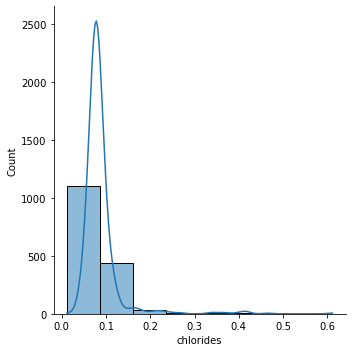

In [41]:
sns.displot(df["chlorides"], bins = 8, kde = True)
#Chlorides betwen 0.01 to 0.09 has higher counts 

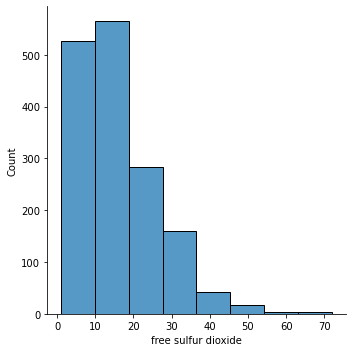

In [42]:
sns.displot(df["free sulfur dioxide"], bins = 8, kde = False)
#Free sulfur dioxide between 10 to 20 has higher counts 

<AxesSubplot:xlabel='quality', ylabel='count'>

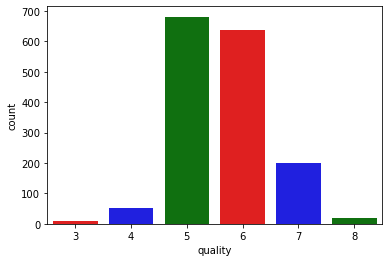

In [43]:
sns.countplot(df["quality"], palette = ["red", "blue", "green"])
#Quality 5 has higher number of counts

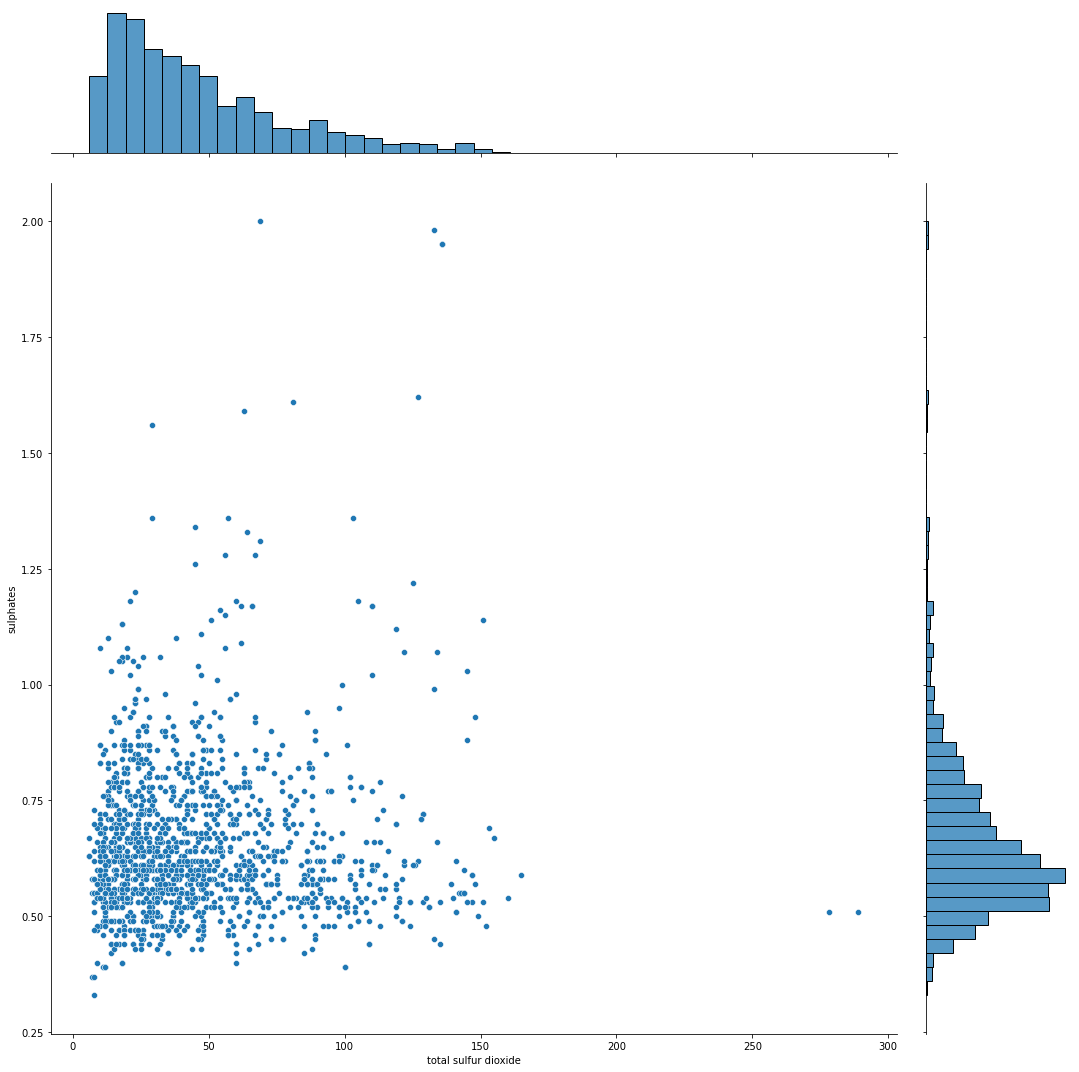

In [44]:
sns.jointplot(x = df["total sulfur dioxide"], y = df["sulphates"], height = 15)
#Sulphates betwwen 0.50 and 1 are mostly present in total sulfur dioxide between 10-120
#Count of total sulfur dioxide equal to 10 and sulphates equal to 0.6 are highest
#As total sulfur dioxide increases concentration/density of sulphates decreases. This contradicts observation No. 8 
#8. Sulphates increases as Total sulpfur increases

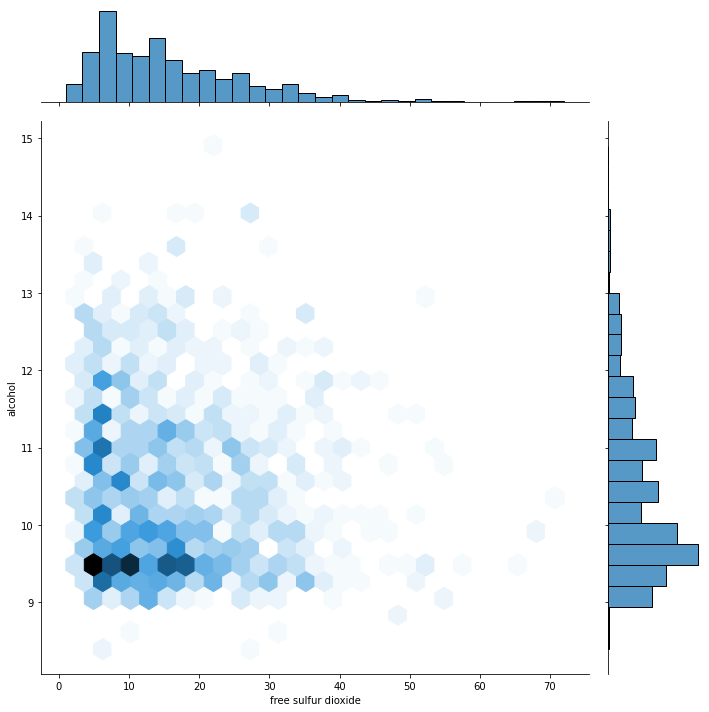

In [45]:
sns.jointplot(x = df["free sulfur dioxide"], y = df["alcohol"], kind = "hex", height = 10)
#free sulfur dioxide between 5 to 20 mostly concentrated in alcohol ranging between 9 to 10
#Contradicts observation 10
#10. Higher total sulfur dioxide/free sulfur dioxide content shows an increasing relationship with alcohol content
#free sulfur dioxide of 30 and alcohol of 9.5 have highest counts

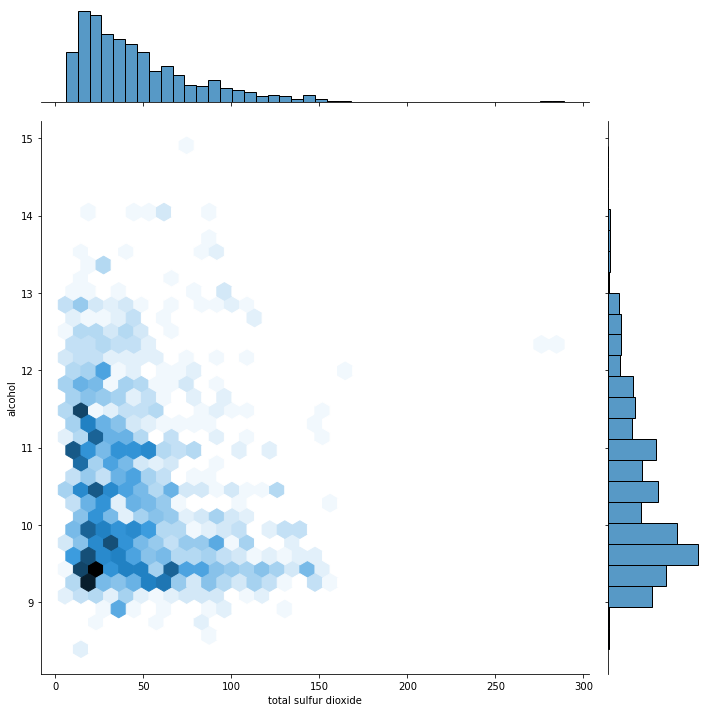

In [46]:
sns.jointplot(x = df["total sulfur dioxide"], y = df["alcohol"], kind = "hex", height = 10)
#Total sulfur dioxide between 10 to 50 is mostly concentrated in alcohol ranging between 9 to 12
#Contradicts observation 10
#10. Higher total sulfur dioxide/free sulfur dioxide content shows an increasing relationship with alcohol content
#Total sulfur dioxide of 30 and alcohol of 9.5 have highest counts

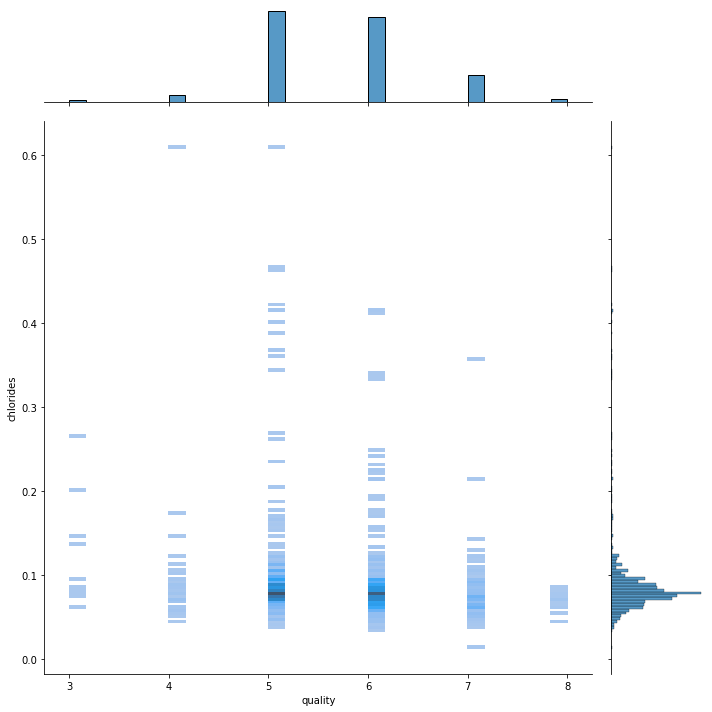

In [47]:
sns.jointplot(x = df["quality"], y = df["chlorides"], kind = "hist", height = 10)
#This validates observation 11
#11. Less chlorides give good quality of wine
#Count of chlorides = 0.1 and quality of 5 are the highest

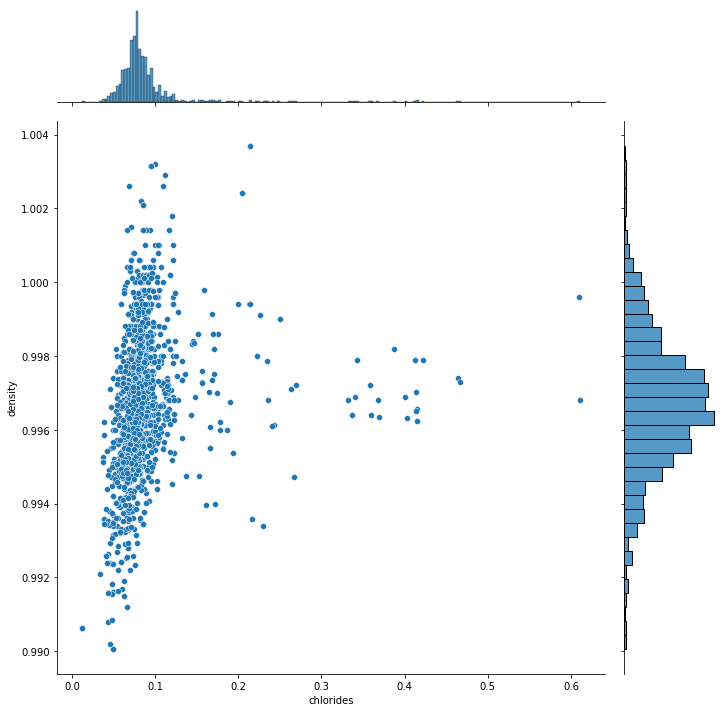

In [48]:
sns.jointplot(x = df["chlorides"], y = df["density"], height = 10)
#Density highest within chlorides concentration of 0.03 to 0.1
#This contradicts observation No. 12 
#12. As chlorides increases density increases, hence quality decreases

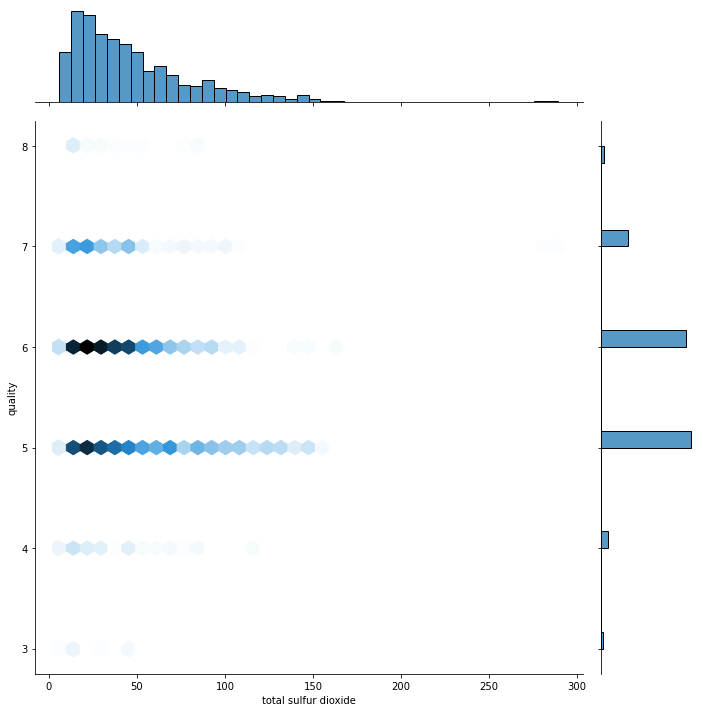

In [49]:
sns.jointplot(x = df["total sulfur dioxide"], y = df["quality"], kind = "hex", height = 10)
#This validates observation 13 as good quality wine has lower total sulfur dioxide 
#13. Higher total sulfur concentration reduces quality, moderate concetration gives good quality

In [50]:
df4 = df.sample(20)

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

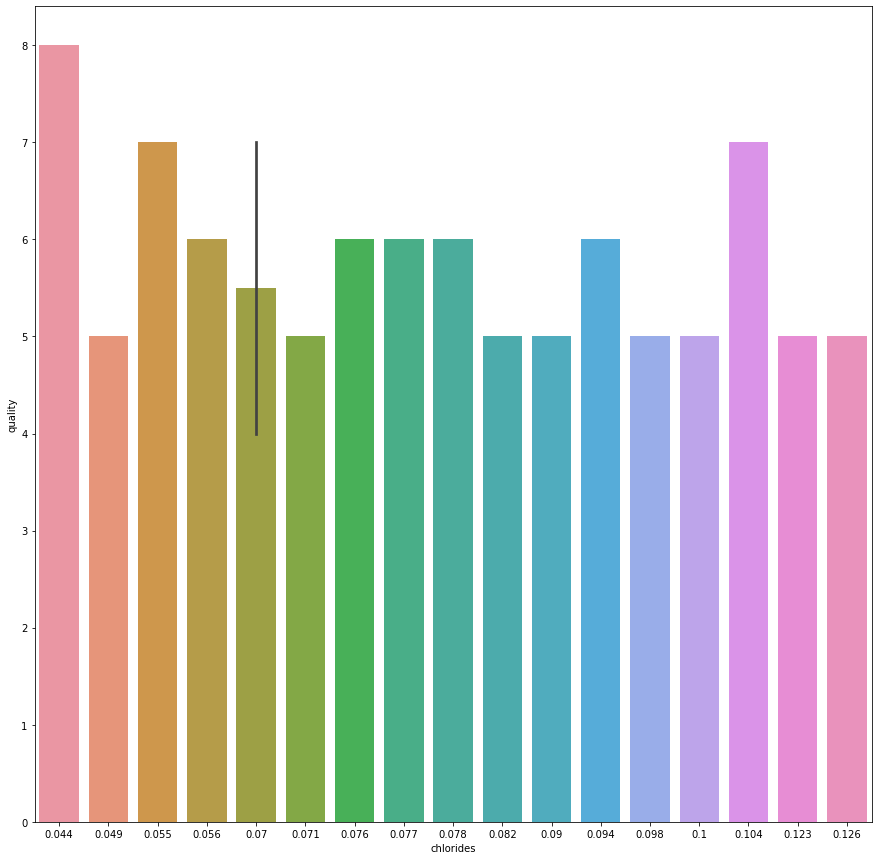

In [51]:
fig, ax = plt.subplots(figsize = (15,15))
sns.barplot(x = df4["chlorides"], y = df4["quality"], ax = ax)
#Lesser chlorides good quality in a sample of 20 dataset, validates observation 11
#11. Less chlorides give good quality of wine

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

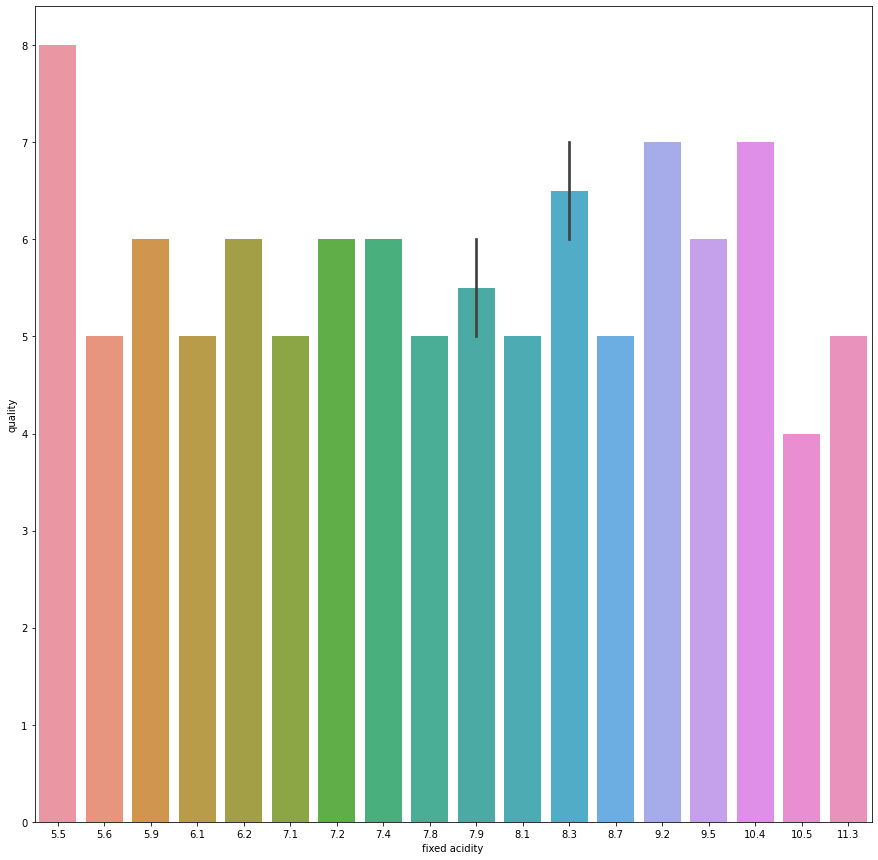

In [52]:
fig, ax = plt.subplots(figsize = (15,15))
sns.barplot(x = df4["fixed acidity"], y = df4["quality"], ax=ax)
#As fixed acidity increases, quality increases for this sample, validates observation 1
#1. Higher fixed acidity above 7 gives the good quality of wine

<AxesSubplot:xlabel='pH', ylabel='quality'>

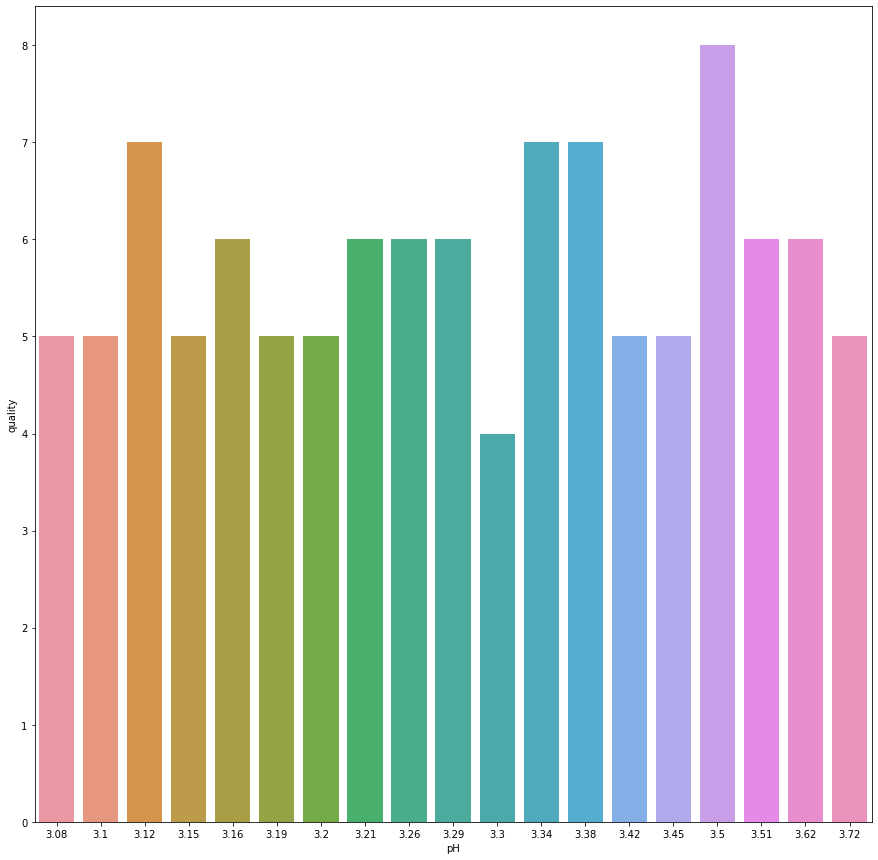

In [53]:
fig, ax = plt.subplots(figsize = (15,15))
sns.barplot(x = df4["pH"], y = df4["quality"],ax=ax)

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

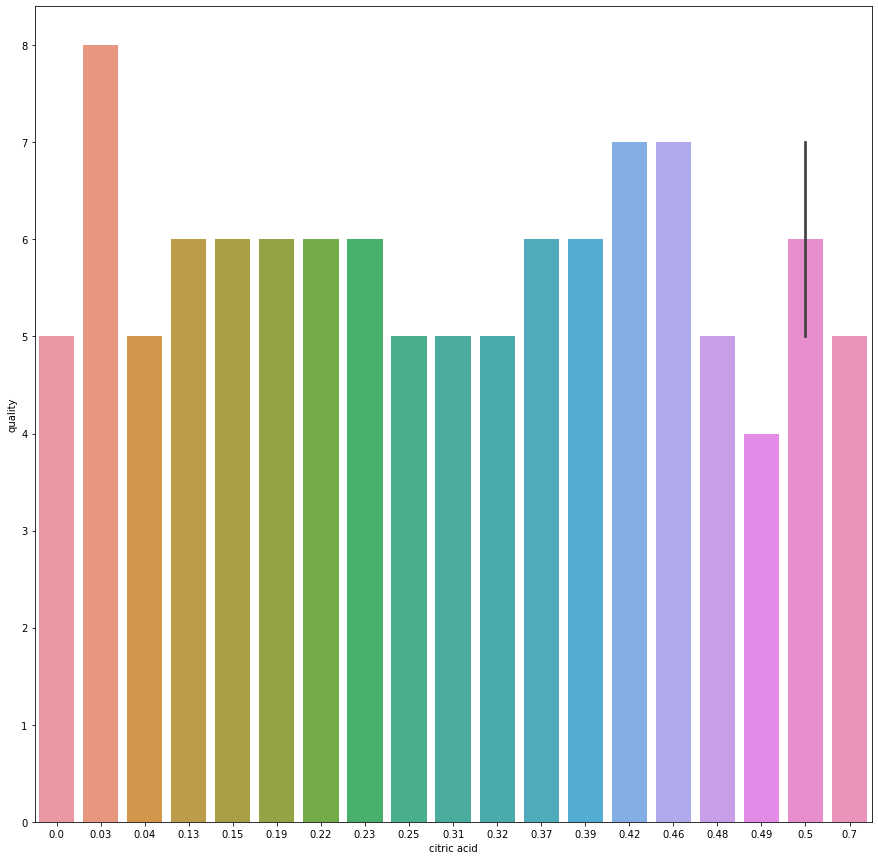

In [54]:
fig, ax = plt.subplots(figsize = (15,15))
sns.barplot(x = df4["citric acid"], y = df4["quality"], ax=ax)
#This is not a good sample to comment about citric acid as observation 3 is proved using code

<AxesSubplot:ylabel='total sulfur dioxide'>

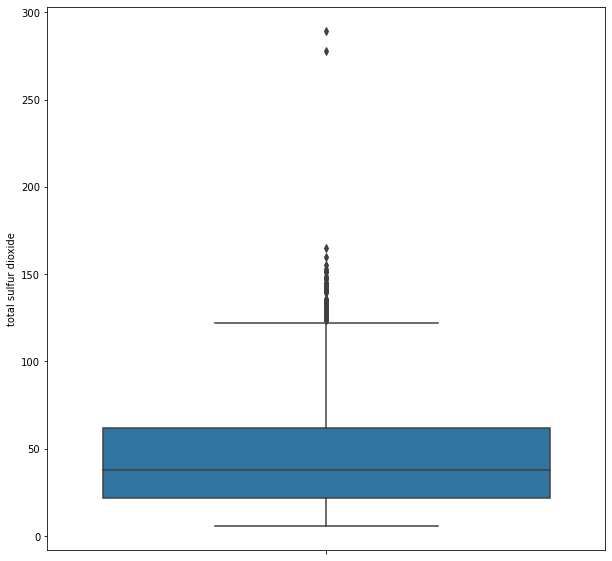

In [55]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(y = df["total sulfur dioxide"])
#25 percentile - 22
#50 percentile - 38
#75 percentie - 62
# Values above 130 are outliers
#IQR - 40, majority value lies between 22 and 62

In [56]:
df["total sulfur dioxide"].describe()

count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64

<AxesSubplot:ylabel='fixed acidity'>

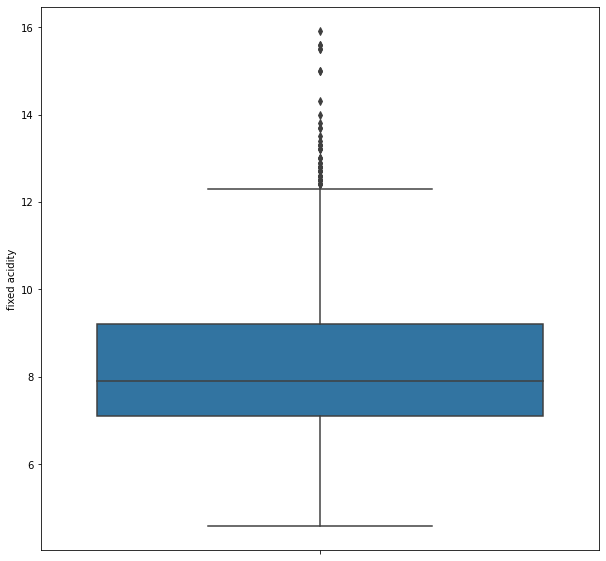

In [57]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(y = df["fixed acidity"])
#25 percentile - 7
#50 percentile - 8
#75 percentie - 9
# Values above 12.2 are outliers
#IQR - 2

<AxesSubplot:ylabel='volatile acidity'>

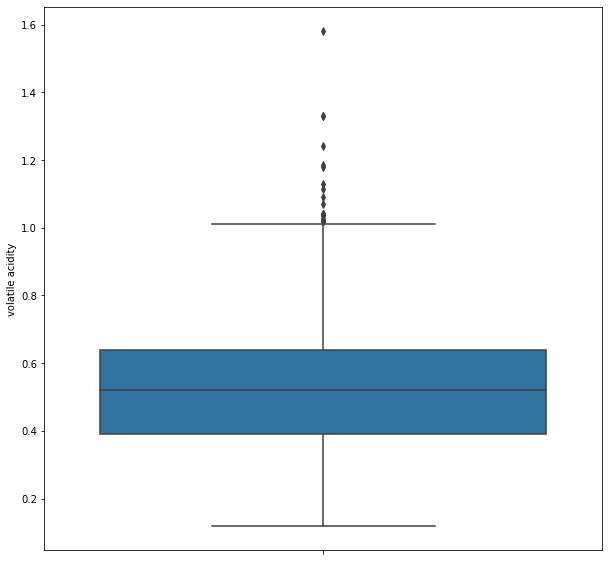

In [58]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(y = df["volatile acidity"])
#25 percentile - 0.4
#50 percentile - 0.55
#75 percentie - 0.62
# Values above 1.02 are outliers
#IQR - 0.22

<AxesSubplot:ylabel='citric acid'>

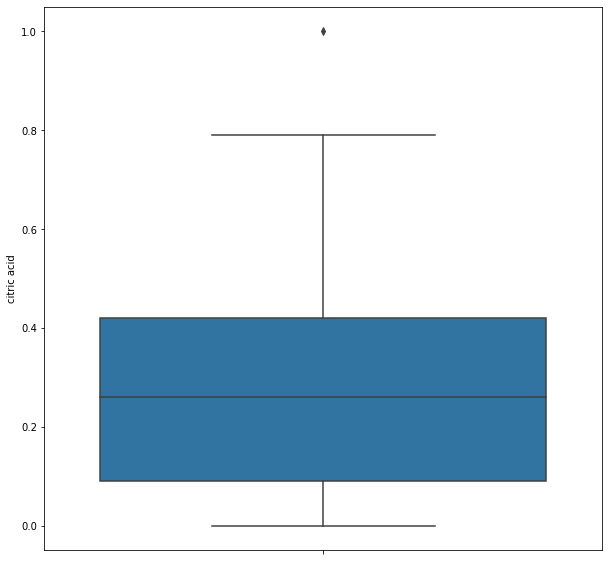

In [59]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(y = df["citric acid"])
#25 percentile - 0.1
#50 percentile - 0.28
#75 percentie - 0.41
# Values above 0.8 are outliers
#IQR - 0.31

<AxesSubplot:ylabel='residual sugar'>

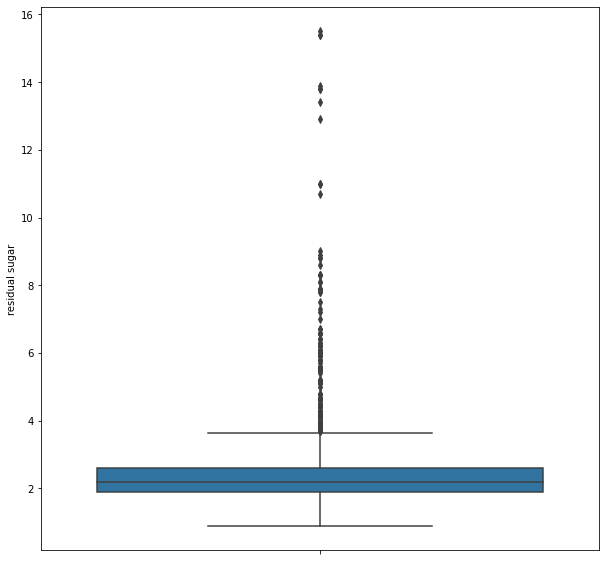

In [60]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(y = df["residual sugar"])
#25 percentile - 2
#50 percentile - 2.2
#75 percentie - 2.8
# Values above 3.9 are outliers
#IQR - 0.8

<AxesSubplot:ylabel='chlorides'>

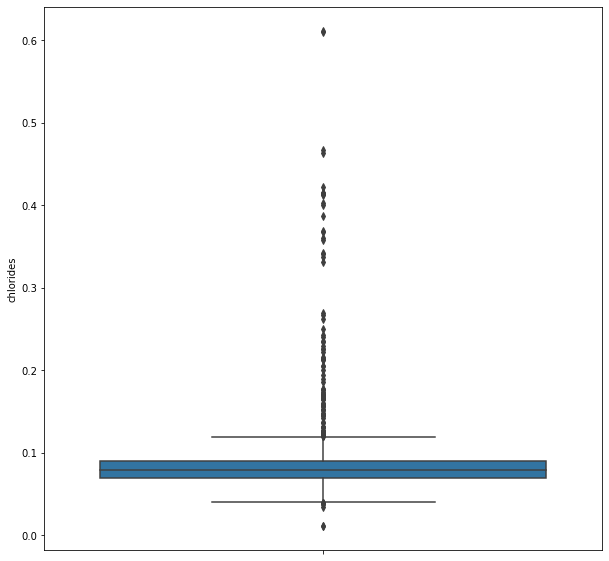

In [61]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(y = df["chlorides"])
# Values above 0.125 are outliers

<AxesSubplot:ylabel='free sulfur dioxide'>

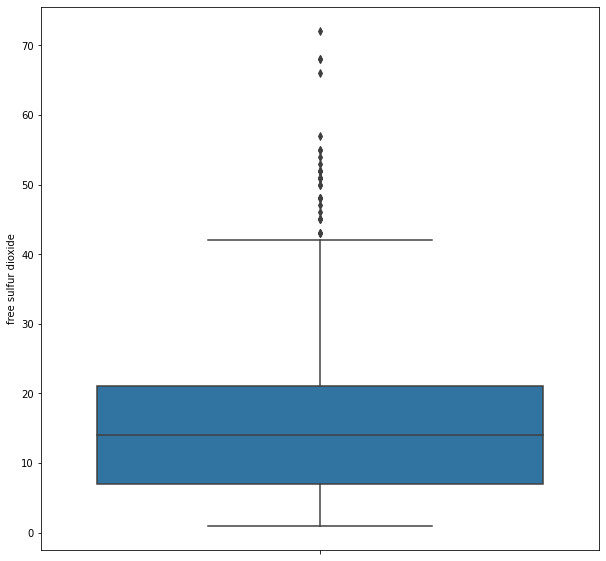

In [62]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(y = df["free sulfur dioxide"])
# Values above 22 are outliers, Positively skewed

<AxesSubplot:ylabel='density'>

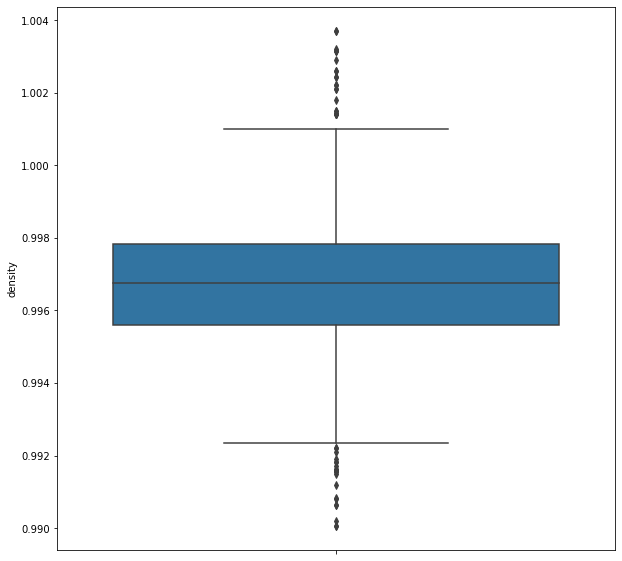

In [63]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(y = df["density"])
# Values above 1.0001 are outliers

<AxesSubplot:ylabel='pH'>

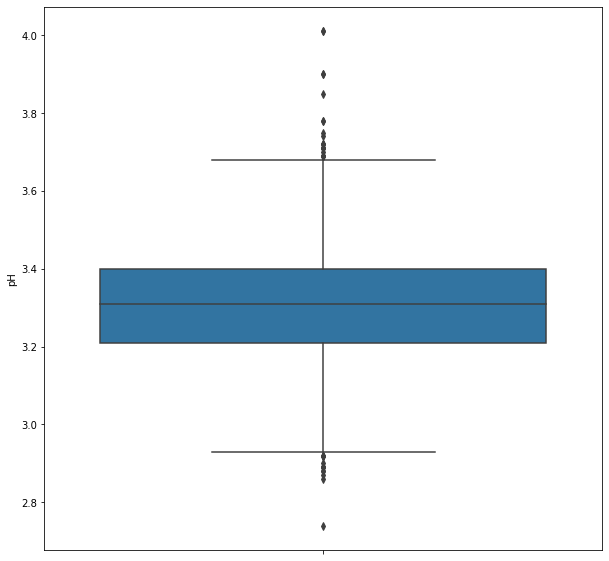

In [64]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(y = df["pH"])
# Values above 3.7 are outliers

<AxesSubplot:ylabel='sulphates'>

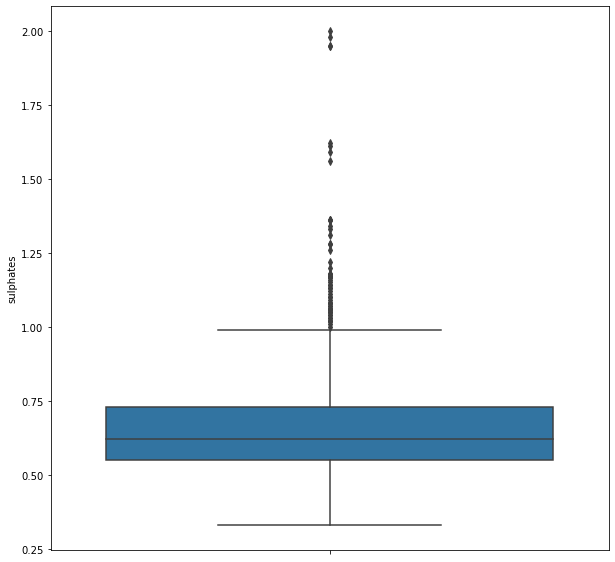

In [65]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(y = df["sulphates"])
# Values above 1.00 are outliers

<AxesSubplot:ylabel='alcohol'>

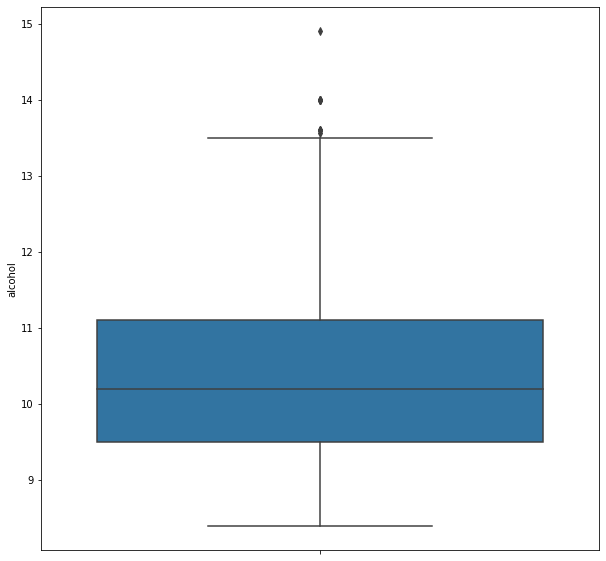

In [66]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(y = df["alcohol"])
# Values above 13.5 are outliers

<AxesSubplot:ylabel='quality'>

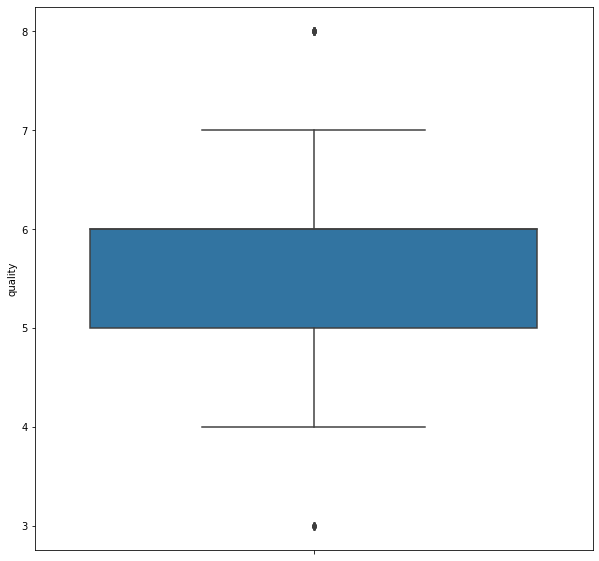

In [67]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(y = df["quality"])
# Values above 7 are outliers
#2 outliers 8 and 3
#Normally distributed between 4 to 7
#75 percentile - 6
#25 percentile - 5

<AxesSubplot:ylabel='quality'>

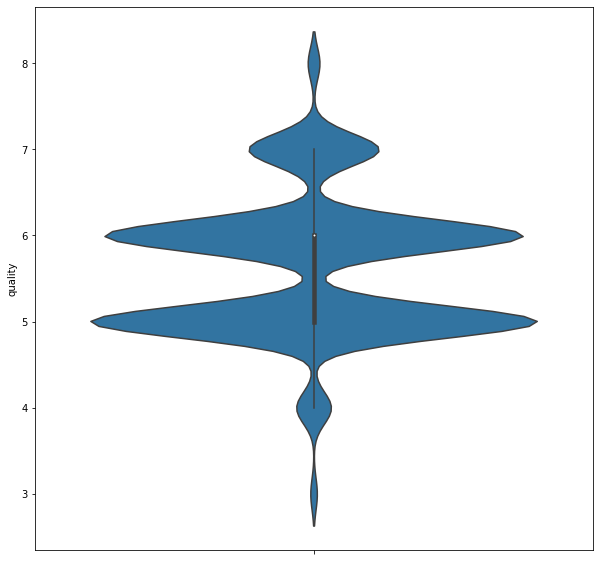

In [68]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y = df["quality"])
#Quality 5 counts are highest followed by Quality 6

<AxesSubplot:ylabel='alcohol'>

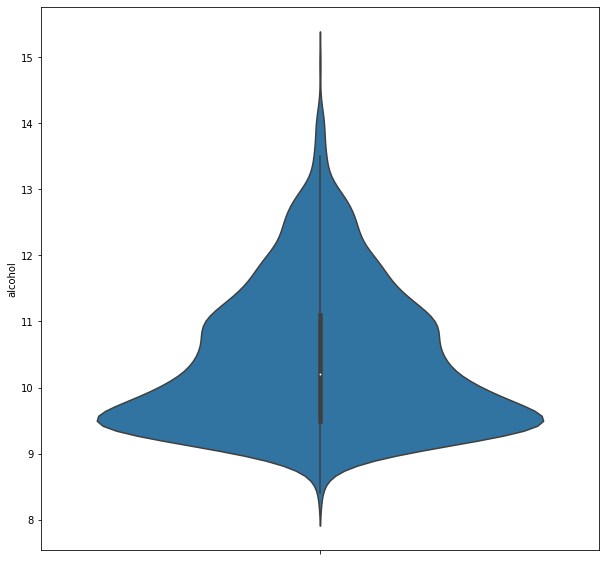

In [69]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y = df["alcohol"])
#Alcohol value 9.5 counts are highest

<AxesSubplot:ylabel='sulphates'>

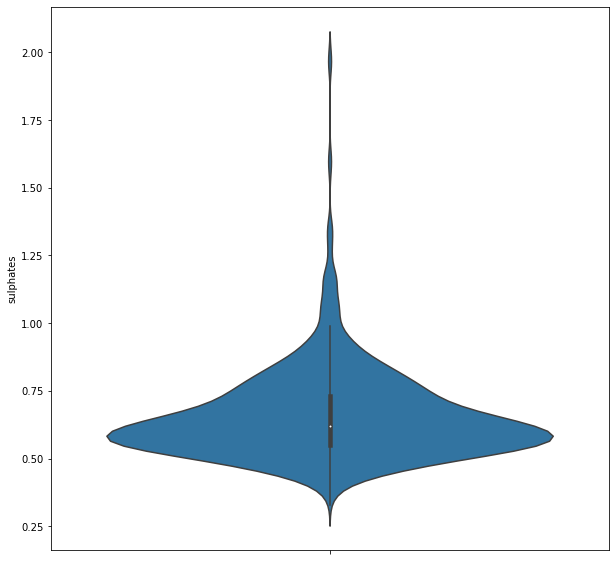

In [70]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y = df["sulphates"])
#Sulphates value of 0.55 has highest counts

<AxesSubplot:ylabel='pH'>

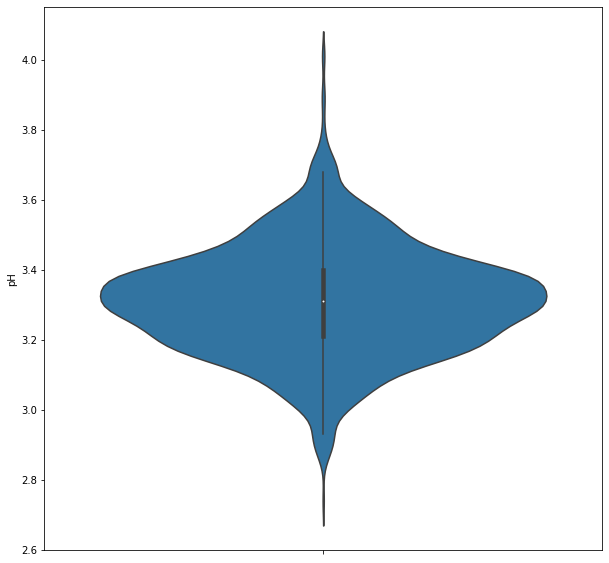

In [71]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y = df["pH"])
#pH of 3.35 counts are the highest

<AxesSubplot:ylabel='density'>

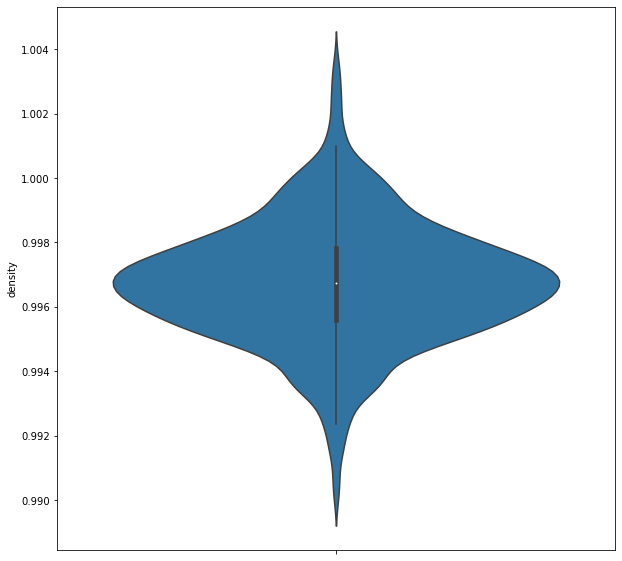

In [72]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y = df["density"])
#Density value of 0.997 are the highest

<AxesSubplot:ylabel='total sulfur dioxide'>

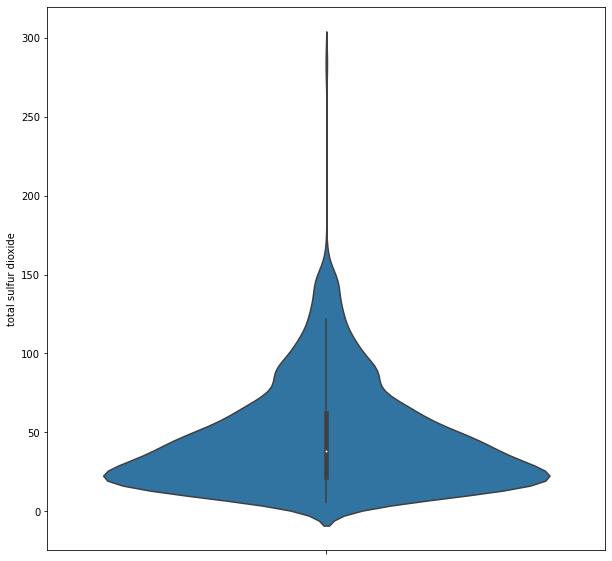

In [73]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y = df["total sulfur dioxide"])
#Total Sulfur dioxide of value 25 has highest distribution

<AxesSubplot:ylabel='free sulfur dioxide'>

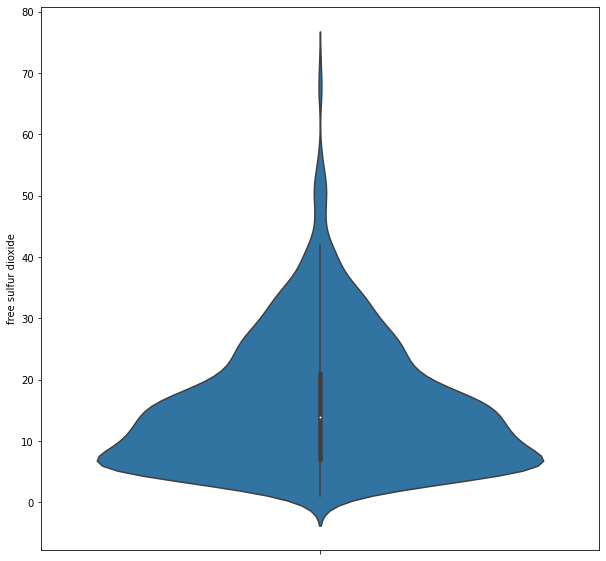

In [74]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y = df["free sulfur dioxide"])
#free sulfur dioxide around 9 has highest counts

<AxesSubplot:ylabel='chlorides'>

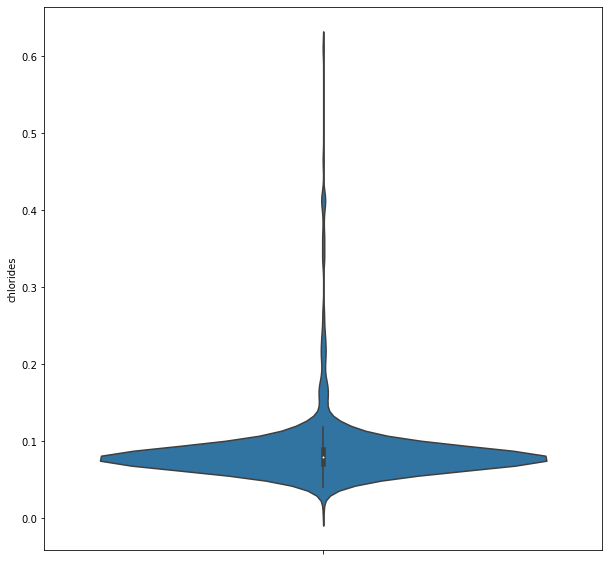

In [75]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y = df["chlorides"])
#0.085 value of chlorides have highest counts

<AxesSubplot:ylabel='residual sugar'>

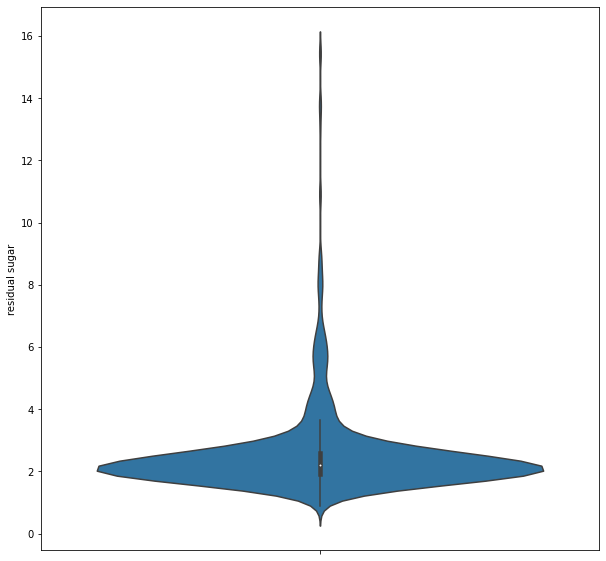

In [76]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y = df["residual sugar"])
#Residual sugar with value 2 has highest counts

<AxesSubplot:ylabel='citric acid'>

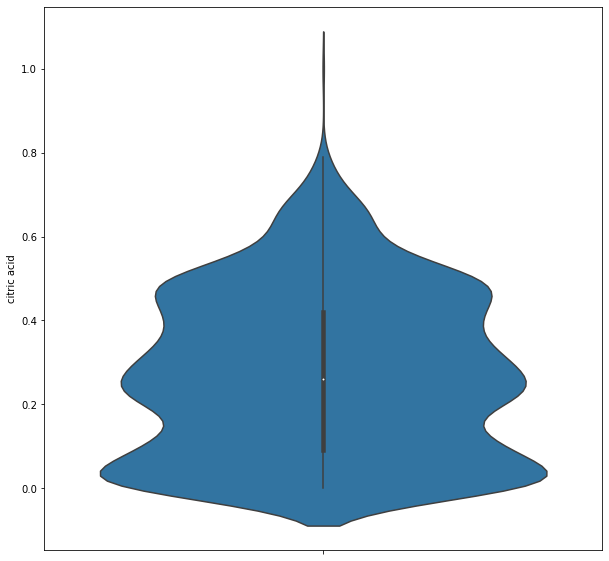

In [77]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y = df["citric acid"])
#Citric acid value of 0.01 has highest counts followed by 0.25 and 0.5

<AxesSubplot:ylabel='volatile acidity'>

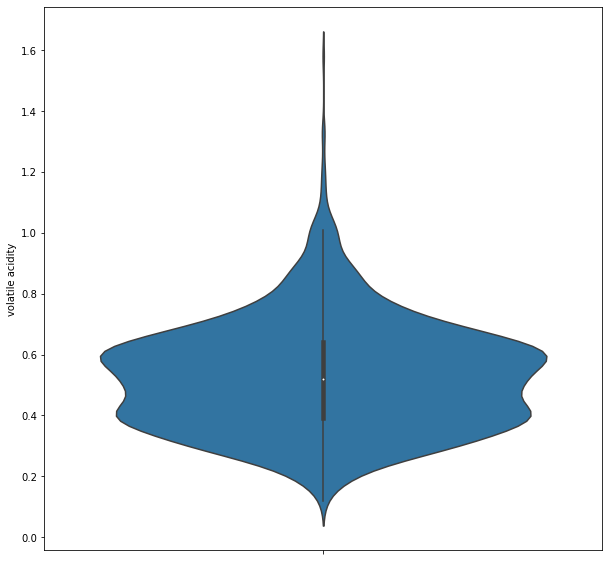

In [78]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y = df["volatile acidity"])
#volatile acidity value of 0.6 has highest counts followed by 0.4

<AxesSubplot:ylabel='fixed acidity'>

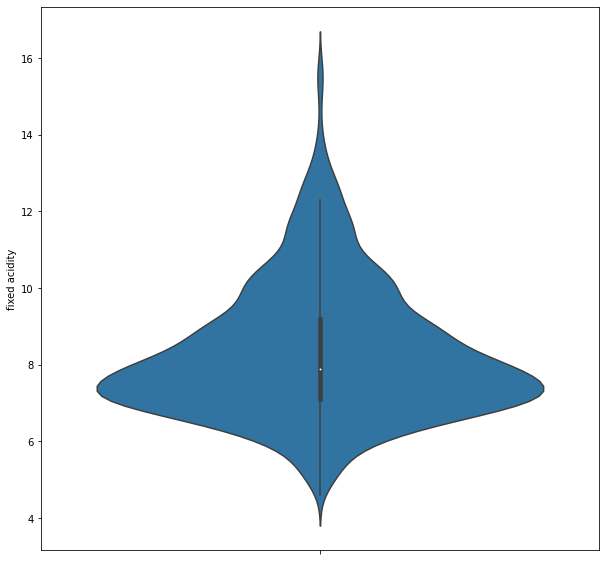

In [79]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y = df["fixed acidity"])
#value of 7.5 has highest counts

<AxesSubplot:xlabel='quality', ylabel='density'>

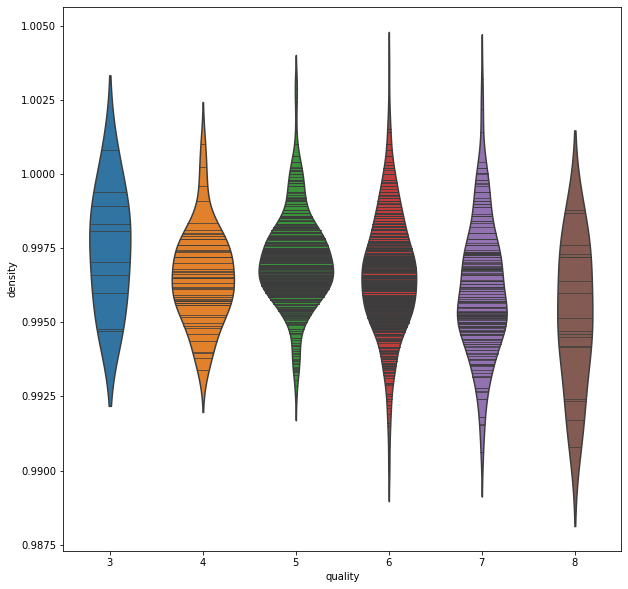

In [80]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y = df["density"], x = df["quality"], inner = "stick")
#various distributions of sulphates are obtained for different quality
#Good quality wine have comparitively lesser density, validates observation 5
#5. As density increases quality of wine decreases

<AxesSubplot:xlabel='quality', ylabel='pH'>

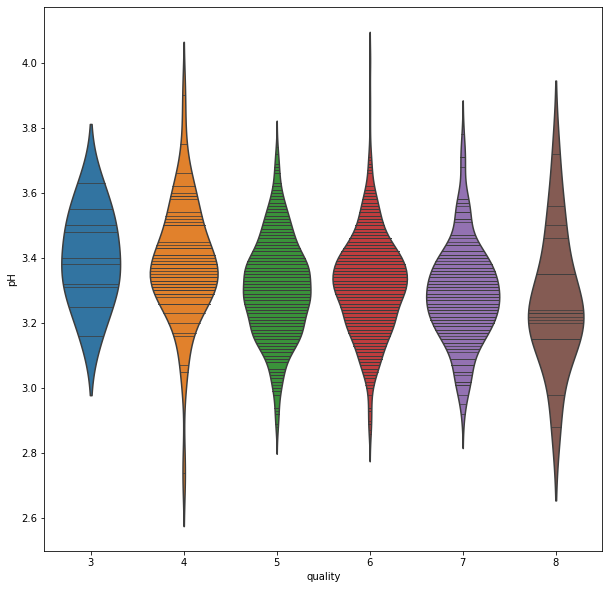

In [81]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y = df["pH"], x = df["quality"], inner = "stick")
#Good quality wine has slightly less ph around 3.3
#Validates Observation 6
#6. ph value in range 3.2 - 3.4 gives good quality

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

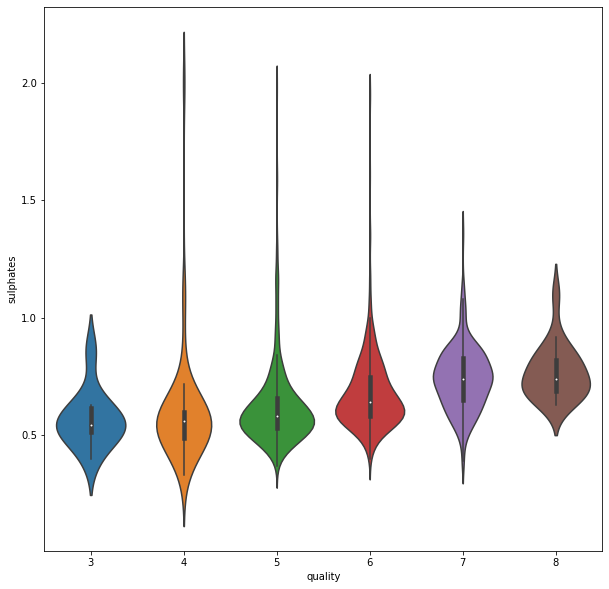

In [82]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y = df["sulphates"], x = df["quality"], inner = "box")
#Good quality wine have sulphates in the range of 0.70 to 0.75
#This partially validates observation 7
#7. Sulphates value in the range of 0.47 - 0.75 gives the good quality of wine

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

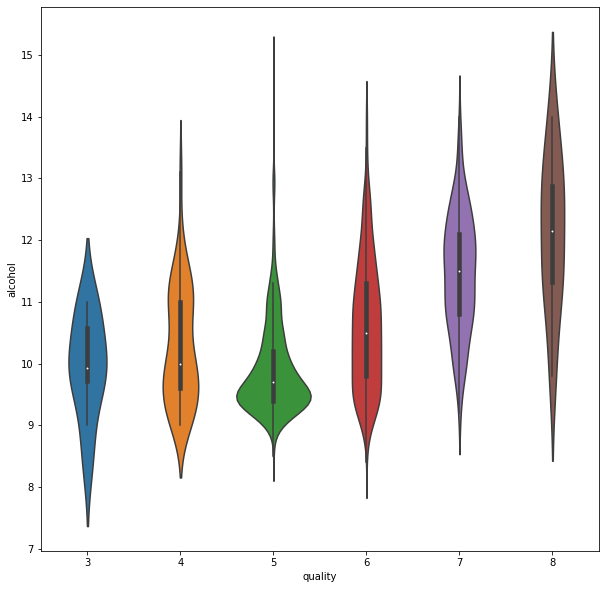

In [83]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y = df["alcohol"], x = df["quality"], inner = "box")
#Good quality wine have alcohol content in the range of 11-12
#This contradicts observation 9
#9. Alcohol content between 9-10.5 gives good quality of wine

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

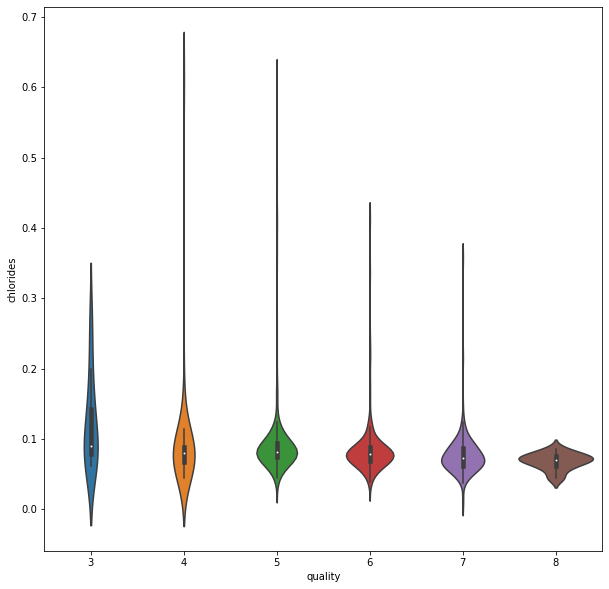

In [84]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y = df["chlorides"], x = df["quality"], inner = "box")
#Good quality wine have chlorides approximately equal to 0.05 to 0.1
#Validates observation 11
#11. Less chlorides give good quality of wine

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

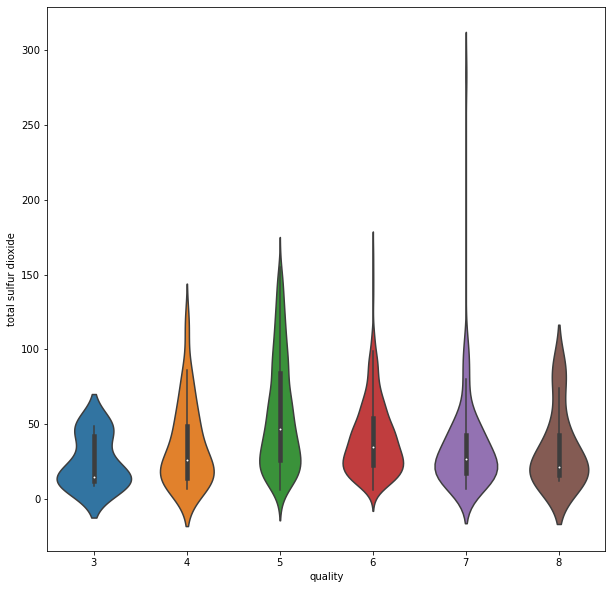

In [85]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y = df["total sulfur dioxide"], x = df["quality"], inner = "box")
#Good quality of wine has total sulfur dioxide between 20 to 40
#Validates observation 13
#13. Higher total sulfur concentration reduces quality, moderate concetration gives good quality

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

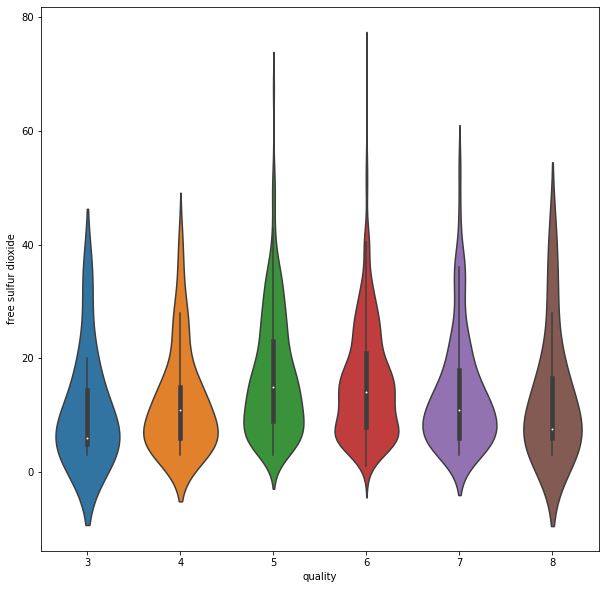

In [86]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y = df["free sulfur dioxide"], x = df["quality"], inner = "box")
#Good quality of wine has free sulfur dioxide between 0 to 15
#Validates observation 13
#13. Higher total sulfur concentration reduces quality, moderate concetration gives good quality

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

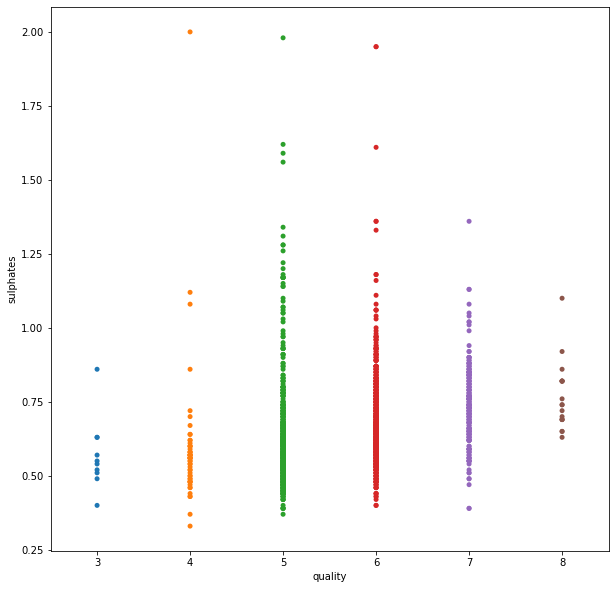

In [87]:
fig, ax = plt.subplots(figsize = (10,10))
sns.stripplot(y = df["sulphates"], x = df["quality"], jitter = False, dodge = False)
#various distributions of sulphates are obtained for different quality
#Good quality of wine have sulphate range of 0.5 to 0.8
#partially validates observation 7
#7. Sulphates value in the range of 0.47 - 0.75 gives the good quality of wine

<AxesSubplot:xlabel='quality', ylabel='density'>

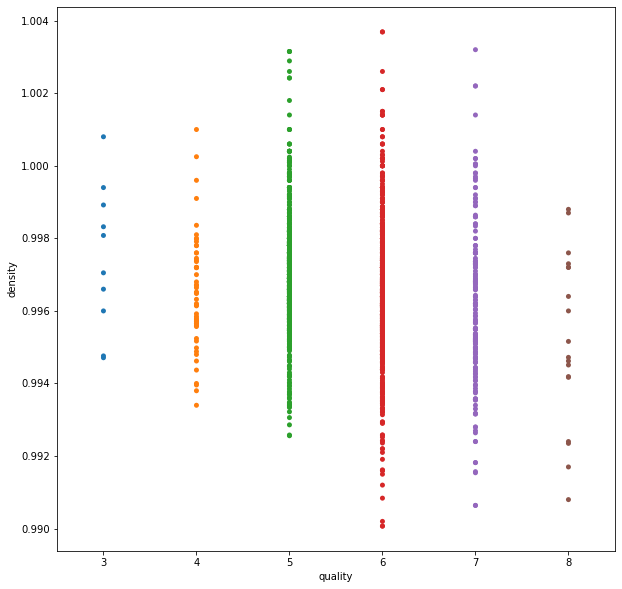

In [88]:
fig, ax = plt.subplots(figsize = (10,10))
sns.stripplot(y = df["density"], x = df["quality"], jitter = False, dodge = False)
#various distributions of sulphates are obtained for different quality
#Good quality wine have comparitively lesser density, validates observation 5
#5. As density increases quality of wine decreases

<AxesSubplot:xlabel='quality', ylabel='density'>

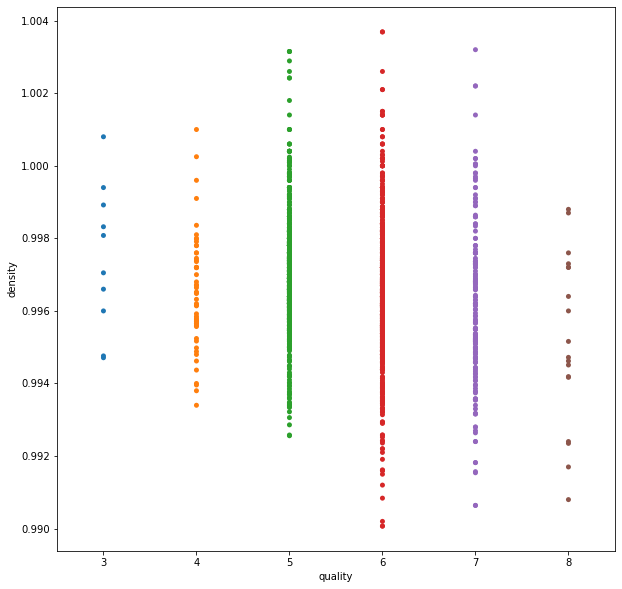

In [89]:
fig, ax = plt.subplots(figsize = (10,10))
sns.stripplot(y = df["density"], x = df["quality"], jitter = False, dodge = False)
#various distributions of sulphates are obtained for different quality
#Good quality wine have comparitively lesser density, validates observation 5
#5. As density increases quality of wine decreases

<AxesSubplot:xlabel='quality', ylabel='pH'>

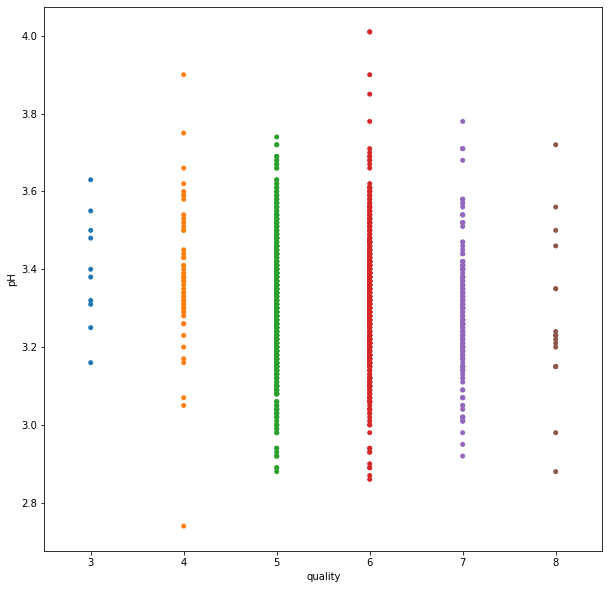

In [90]:
fig, ax = plt.subplots(figsize = (10,10))
sns.stripplot(y = df["pH"], x = df["quality"], jitter = False, dodge = False)
#Good quality wine has slightly less ph around 3.3
#Validates Observation 6
#6. ph value in range 3.2 - 3.4 gives good quality

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

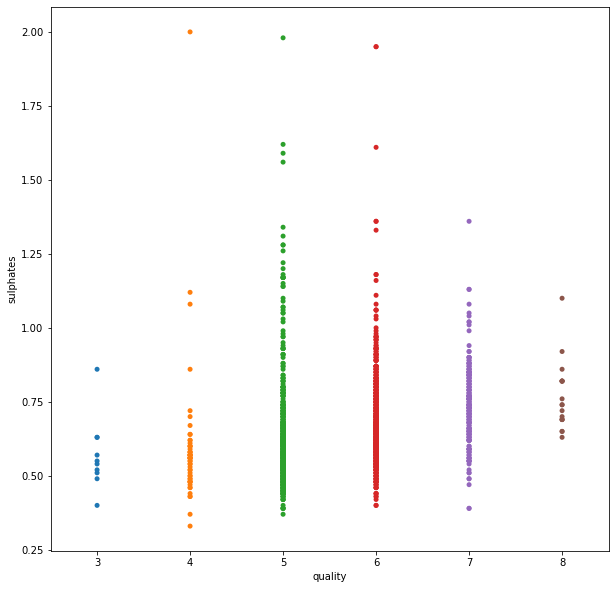

In [91]:
fig, ax = plt.subplots(figsize = (10,10))
sns.stripplot(y = df["sulphates"], x = df["quality"], jitter = False, dodge = False)
#Good quality wine have sulphates in the range of 0.70 to 0.75
#This partially validates observation 7
#7. Sulphates value in the range of 0.47 - 0.75 gives the good quality of wine

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

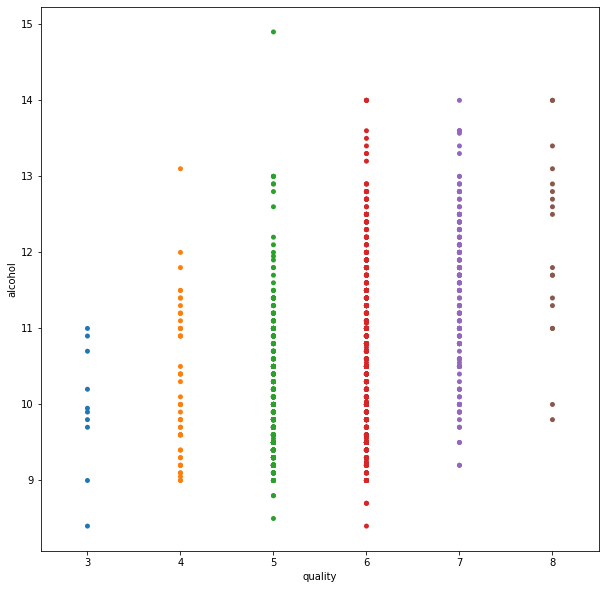

In [92]:
fig, ax = plt.subplots(figsize = (10,10))
sns.stripplot(y = df["alcohol"], x = df["quality"], jitter = False, dodge = False)
#Good quality wine have alcohol content in the range of 11-12
#This contradicts observation 9
#9. Alcohol content between 9-10.5 gives good quality of wine

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

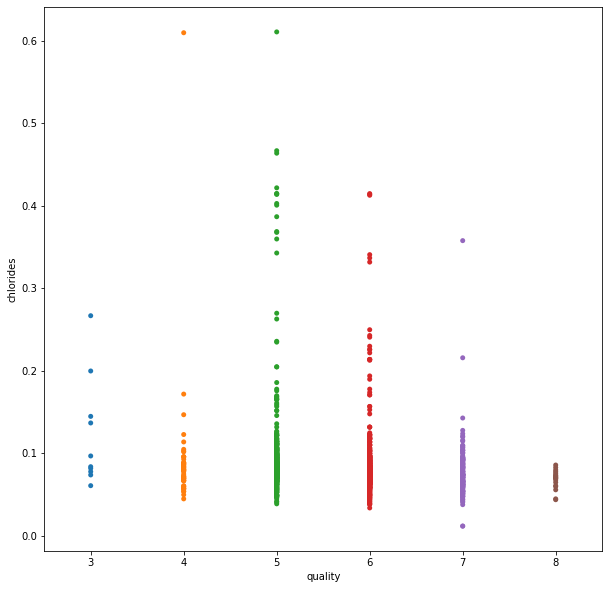

In [93]:
fig, ax = plt.subplots(figsize = (10,10))
sns.stripplot(y = df["chlorides"], x = df["quality"], jitter = False, dodge = False)
#Good quality wine have chlorides approximately equal to 0.05 to 0.1
#Validates observation 11
#11. Less chlorides give good quality of wine

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

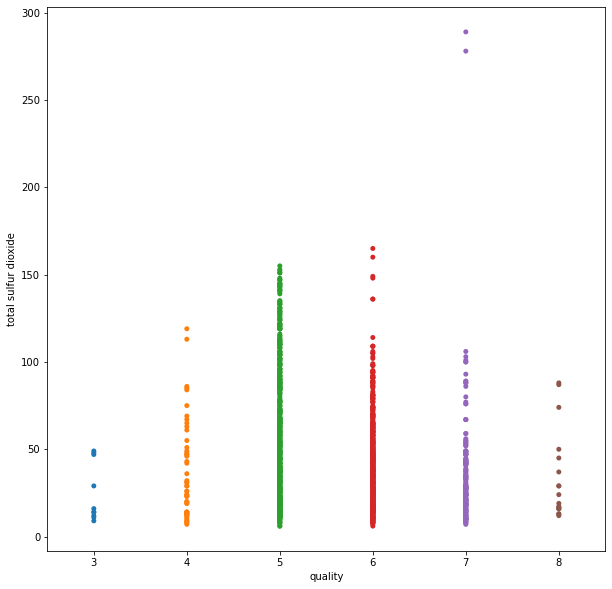

In [94]:
fig, ax = plt.subplots(figsize = (10,10))
sns.stripplot(y = df["total sulfur dioxide"], x = df["quality"], jitter = False, dodge = False)
#Good quality of wine has total sulfur dioxide between 20 to 40
#Validates observation 13
#13. Higher total sulfur concentration reduces quality, moderate concetration gives good quality

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

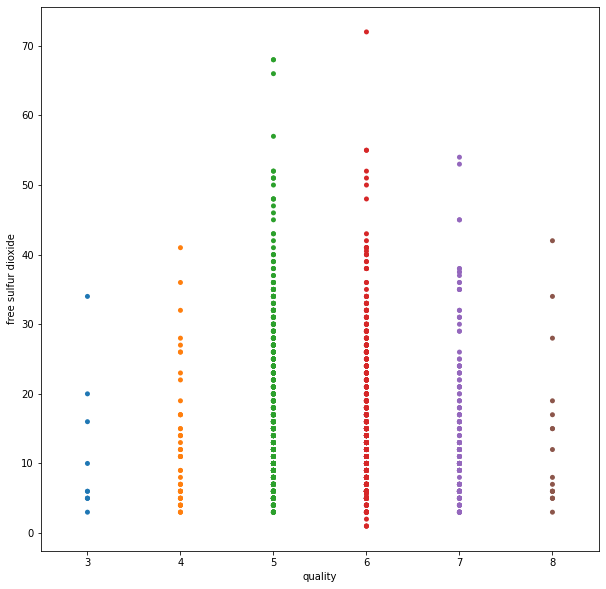

In [95]:
fig, ax = plt.subplots(figsize = (10,10))
sns.stripplot(y = df["free sulfur dioxide"], x = df["quality"], jitter = False, dodge = False)
#Good quality of wine has free sulfur dioxide between 0 to 15
#Validates observation 13
#13. Higher total sulfur concentration reduces quality, moderate concetration gives good quality

## Conclusions based on EDA

In [96]:
#Assuming value of 6-8 as good quality

#1. Higher fixed acidity above 7 gives the good quality of wine - True
#2. Volatile acidity lesser than 0.5 gives the good quality - True
#3. Citric acid value less than 0.5 gives the good quality - True
#4. Residual sugar above 1.8 gives the good quality - True
#5. As density increases quality of wine decreases - True
#6. ph value in range 3.2 - 3.4 gives good quality - True
#7. Sulphates value in the range of 0.47 - 0.75 gives the good quality of wine - Partially True
#8. Sulphates increases as Total sulpfur increases - False
#9. Alcohol content between 9-10.5 gives good quality of wine - False
#10. Higher total sulfur dioxide/free sulfur dioxide content shows an increasing relationship with alcohol content - False
#11. Less chlorides give good quality of wine - True
#12. As chlorides increases density increases, hence quality decreases - False
#13. Higher total sulfur concentration reduces quality, moderate concetration gives good quality - True
#14. Fixed acidity and density have moderately higher positive correlation and fixed acidity and pH have 
#moderately higher negative correlation
#15. Correlation of Total Sulfur dioxide with free sulfur dioxide is moderately positive (higher side) 

## Checking for Missing values

In [97]:
df.isnull().sum()
# It is confirmed that there are no missing values, so Handling them is not required

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [98]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Detecting Outliers

In [99]:
#IQR Method - 

def iqrf(inp):
    Q1 = np.percentile(inp, 25, interpolation = 'midpoint')
    Q3 = np.percentile(inp, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5*IQR
    up_lim = Q3 + 1.5*IQR
    outlier = []
    for x in inp:
        if (x < low_lim or x > up_lim):
            if x not in outlier: # To avoid duplicates, otherwise the number of elements would be huge
                outlier.append(x)
    return outlier

def zf(ip):
    outlier = []
    mu = np.mean(ip)
    sig = np.std(ip)
    for x in ip:
        z = (x - mu)/sig
        if z > 3 or z < -3:
            if x not in outlier: # To avoid duplicates, otherwise the number of elements would be huge
                outlier.append(x)
    return outlier

col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

for i in col:
    ou = iqrf(df[i])
    ou1 = zf(df[i])
    print("Outliers by IQR method for ", i, "are: ", ou)
    print("\n")
    print("Outliers by z-score method for ", i, "are: ", ou1)
    print("\n")
    ou = []
    ou1 = []
    
# Here, we would like to include extreme values for independent and dependent variables to make our model more efficient

Outliers by IQR method for  fixed acidity are:  [12.8, 15.0, 12.5, 13.3, 13.4, 12.4, 13.8, 13.5, 12.6, 14.0, 13.7, 12.7, 15.6, 13.0, 12.9, 14.3, 15.5, 13.2, 15.9]


Outliers by z-score method for  fixed acidity are:  [15.0, 13.8, 14.0, 13.7, 15.6, 14.3, 15.5, 15.9]


Outliers by IQR method for  volatile acidity are:  [1.13, 1.02, 1.07, 1.33, 1.04, 1.09, 1.24, 1.185, 1.035, 1.025, 1.115, 1.58, 1.18]


Outliers by z-score method for  volatile acidity are:  [1.13, 1.07, 1.33, 1.09, 1.24, 1.185, 1.115, 1.58, 1.18]


Outliers by IQR method for  citric acid are:  [1.0]


Outliers by z-score method for  citric acid are:  [1.0]


Outliers by IQR method for  residual sugar are:  [6.1, 3.8, 3.9, 4.4, 10.7, 5.5, 5.9, 5.1, 4.65, 7.3, 7.2, 5.6, 4.0, 7.0, 6.4, 11.0, 4.5, 4.8, 5.8, 6.2, 4.2, 7.9, 3.7, 6.7, 6.6, 5.2, 15.5, 4.1, 8.3, 6.55, 4.6, 4.3, 5.15, 6.3, 6.0, 8.6, 7.5, 4.25, 9.0, 8.8, 5.0, 8.9, 8.1, 4.7, 7.8, 12.9, 13.4, 5.4, 15.4, 3.75, 13.8, 5.7, 13.9]


Outliers by z-score method for  residual

## Checking Multicollinearity - VIF Method

In [100]:
feat = df1[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
vif_data = pd.DataFrame()
vif_data["Feature"] = feat.columns
vif_data["VIF"] = [variance_inflation_factor(feat.values, i) for i in range(len(feat.columns))]
print(vif_data)
#fixed_acidity and density have high multicollinearity

                 Feature          VIF
0          fixed acidity    76.409607
1       volatile acidity    16.924468
2            citric acid    11.003478
3         residual sugar     4.687925
4              chlorides     7.494097
5    free sulfur dioxide     6.405027
6   total sulfur dioxide     6.317093
7                density  1611.848266
8                     pH  1163.148752
9              sulphates    24.525727
10               alcohol   120.280862


## Model Identification

In [101]:
#Since the output variable is categorical in nature having multiple classes, 
#we will go with Decision Tree Classifier, Random Forest, KNN, Naive Baeys, Logistic Regression ML Models and 
#compare their predictions to find out the best model for this multiclassified dataset 

#Since, DT, Random Forest and Naive Baeys are not distance based model feature scaling is not required in these models 
#Hence, Multicollinearity also won't affect much in these models

#For KNN and Logistic Regression, feature scaling is done later

## Checking Balance/Distribution of Target Variable in the datset

In [102]:
df['quality'].value_counts()/len(df['quality'])
# Quality seems unbalanced. Medium quality wines more in the datset. Classes are unequally distributed

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

## Extracting Variables

In [103]:
X = df.drop('quality', axis = 1).values #Creating independent variables, horizontal axis
y = df['quality'].values #Creating target variable

## Train Test Split for Decision Tree, Random Forest, Naive Bayes Models

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) #Random state to ensure 
#reproducability

# Decision Tree Model

In [105]:
model_dt = DecisionTreeClassifier(max_depth = 5) #Instantiate
model_dt.fit(X_train, y_train) #fit, calculate parameters like Weighted Gini Impurity
y_pred = model_dt.predict(X_test) #Prediction for test dataset

### Accuracy Score

In [106]:
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy score is: ", acc_score)

# 60% when test size is 0.3, random state = 125, max depth = 5

Accuracy score is:  0.56875


## Tweaking Random State, Train Test Size and Max depth to understand their significance

In [107]:
#53.125% when test size is 0.2, rs = 42, max depth = 4
#54.79% when test size is 0.3, rs = 42, max depth = 4
#59.68% when test size is 0.2, rs = 125, max depth = 4
#58.54% when test size is 0.3, rs = 125, max depth = 4

#60% when test size is 0.3, rs = 125, max depth = 5
#59.58% when test size is 0.3, rs = 125, max depth = 6
#59.166% when test size is 0.3, rs = 125, max depth = 7
#59.375% when test size is 0.3, rs = 125, max depth = 8

#56.87% when test size is 0.3, rs = 42, max depth = 5
# Observation - Random State, Max Depth and Train Test split affects accuracy
#Lets use GridSearchCV to find out optimum value of max depth and other parameters like criterion

### Finding Best Hyperparameters for DT model with GridSearchCV

In [108]:
#Providing the different values of hyperparameters 
param_dt = {"max_depth" : [3,4,5,6,7,8], "max_features" : ["auto", "sqrt", "log2", None], "criterion" : ["gini", "entropy"], 
            "max_leaf_nodes" : [10, 14, 18, 22, 25, 29, 35, 50], "min_samples_split" : [2,3,4]}
#Running GridSearchCV to get all Permutations & combinations of  these parameters
cv_dt = GridSearchCV(model_dt, cv = 10, param_grid = param_dt, n_jobs = 3)

#Fitting the train dataset
cv_dt.fit(X_train, y_train)

#Printing the best parameters
print("Best parameters for Decision Tree Classifier", cv_dt.best_params_)

Best parameters for Decision Tree Classifier {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 22, 'min_samples_split': 2}


### Specifying best parameters

In [109]:
model_dt.set_params(criterion = 'entropy', max_depth = 6, max_features = None, max_leaf_nodes = 22, min_samples_split = 2)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

### Accuracy score after Hyperparameter tuning

In [110]:
acc_score_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy score after hyperparameter tuning is: ", acc_score_dt)
#Observation - Accuracy improved by approximately 2%

Accuracy score after hyperparameter tuning is:  0.5875


### Confusion Matrix

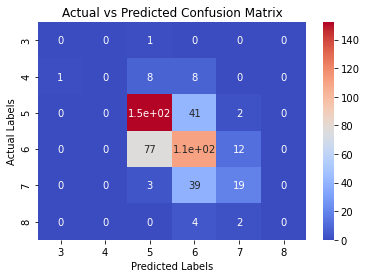

In [111]:
cm = confusion_matrix(y_test, y_pred_dt)
cm_df = pd.DataFrame(cm, index = ['3','4','5','6','7','8'], columns = ['3','4','5','6','7','8'])
ax = plt.subplot()
sns.heatmap(cm_df, annot = True, ax = ax,  cmap = 'coolwarm')
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("Actual Labels")
ax.set_title("Actual vs Predicted Confusion Matrix")
plt.show()

### Interpreting the confusion matrix

In [112]:
#For class 5

#True Positive = 150 # Correctly classified as positive
#False Positive = 77+3+8+1 = 89 # Missclassified as positive
#False Negative = 41+2 = 43 # Missclassified as Negative
#True Negative = 1+8+110+12+39+19+4+2 = 195 # Correctly classified as Negative

# Recall = TP/FN+TP = 150/43+150 = 0.77 
# Precision = TP/FP+TP = 150/89+150 = 0.62
# F1 Score = 2/(1/Precision + 1/Recall) = 0.68
# Accuracy = TP+TN / TP+FP+FN+TN = 150+195/150+195+43+89 = 72.32% for class 5 with Decision Tree Model

### Classification Report

In [113]:
class_rep_dt = classification_report(y_test, y_pred_dt)
print("Classification report is: \n", class_rep_dt)

Classification report is: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.63      0.78      0.70       195
           6       0.55      0.56      0.55       200
           7       0.54      0.31      0.40        61
           8       0.00      0.00      0.00         6

    accuracy                           0.59       480
   macro avg       0.29      0.27      0.27       480
weighted avg       0.55      0.59      0.56       480



In [114]:
print(y_test.shape)
print(X_test.shape)

(480,)
(480, 11)


### AUC

In [115]:
predictions_prob_dt = model_dt.predict_proba(X_test)
print("AUC score with DT model is: ", roc_auc_score(y_test, predictions_prob_dt, multi_class = "ovr"))

AUC score with DT model is:  0.6614096178801517


# Random Forest Model

In [116]:
fit_rf = RandomForestClassifier()

### Finding Best Hyperparameters for RF model with GridSearchCV

In [117]:
#Providing the different values of hyperparameters 
param_dtrf = {"max_depth" : [2,3,4,5,6,7,8], "max_features" : ["auto", "sqrt", "log2", None], 
              "criterion" : ["gini", "entropy"], "bootstrap" : [True, False]}
#Running GridSearchCV to get all Permutations & combinations of  these parameters
cv_dtrf = GridSearchCV(fit_rf, cv = 10, param_grid = param_dtrf, n_jobs = 3)

#Fitting the train dataset
cv_dtrf.fit(X_train, y_train)

#Printing the best parameters
print("Best parameters for Decision Tree Classifier", cv_dtrf.best_params_)

Best parameters for Decision Tree Classifier {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt'}


### Specifying best parameters

In [118]:
fit_rf.set_params(criterion = 'entropy', max_depth = 8, max_features = 'log2', bootstrap = True)
fit_rf.fit(X_train, y_train)
y_pred_rf = fit_rf.predict(X_test)

### Accuracy Score

In [119]:
acc_score_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy score of Random Forest classifier is: ", acc_score_rf)
# Improvement observed in accuracy as compared to Decision Tree Classifier

Accuracy score of Random Forest classifier is:  0.6375


### Confusion Matrix

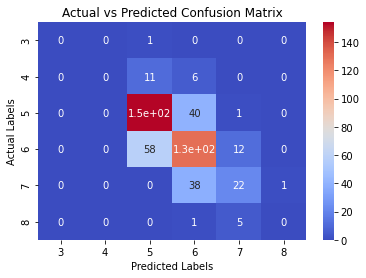

In [120]:
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm, index = ['3','4','5','6','7','8'], columns = ['3','4','5','6','7','8'])
ax = plt.subplot()
sns.heatmap(cm_df, annot = True, ax = ax,  cmap = 'coolwarm')
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("Actual Labels")
ax.set_title("Actual vs Predicted Confusion Matrix")
plt.show()

### Interpreting the confusion matrix

In [121]:
#For class 6

#True Positive = 120 # Correctly classified as positive
#False Positive = 8+41+37+2 = 88 # Missclassified as positive
#False Negative = 59+16 = 75 # Missclassified as Negative
#True Negative = 1+9+150+2+1+22+1+4 = 190 # Correctly classified as Negative


# Recall = TP/FN+TP = 120/75+120 = 0.61 
# Precision = TP/FP+TP = 120/88+120 = 0.57
# F1 Score = 2/(1/Precision + 1/Recall) = 0.58
# Accuracy = TP+TN / TP+FP+FN+TN = 120+190/120+88+75+190 = 65.53% for class 6 with Random Forest Model

### Classification Report

In [122]:
class_rep_rf = classification_report(y_test, y_pred_rf)
print("Classification report is: \n", class_rep_rf)

Classification report is: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.69      0.79      0.74       195
           6       0.60      0.65      0.63       200
           7       0.55      0.36      0.44        61
           8       0.00      0.00      0.00         6

    accuracy                           0.64       480
   macro avg       0.31      0.30      0.30       480
weighted avg       0.60      0.64      0.62       480



### AUC Score

In [123]:
predictions_prob_rf = fit_rf.predict_proba(X_test)
print("AUC score with RF model is: ", roc_auc_score(y_test, predictions_prob_rf, multi_class = "ovr"))

AUC score with RF model is:  0.7611314259715072


# Naive Bayes Model

In [124]:
gnb = GaussianNB() #Instantiation
gnb.fit(X_train, y_train) #Train
y_pred_gnb = gnb.predict(X_test) #Predict

### Accuracy Score

In [125]:
# Evaluation
acc_score_gnb = accuracy_score(y_test, y_pred_gnb)
print("Accuracy score of Naive Bayes classifier is: ", acc_score_gnb)
#Accuracy of Naive Baeys is least

Accuracy score of Naive Bayes classifier is:  0.5416666666666666


### Confusion Matrix

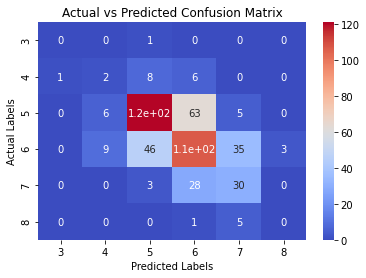

In [126]:
cm = confusion_matrix(y_test, y_pred_gnb)
cm_df = pd.DataFrame(cm, index = ['3','4','5','6','7','8'], columns = ['3','4','5','6','7','8'])
ax = plt.subplot()
sns.heatmap(cm_df, annot = True, ax = ax,  cmap = 'coolwarm')
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("Actual Labels")
ax.set_title("Actual vs Predicted Confusion Matrix")
plt.show()

### Interpreting the Confusion Matrix

In [127]:
#For class 4

#True Positive = 2 # Correctly classified as positive
#False Positive = 6+9 = 15 # Missclassified as positive
#False Negative = 1+8+6 = 15 # Missclassified as Negative 
#True Negative = 1+120+63+5+46+110+35+3+3+28+30+1+5 = 450 # Correctly classified as Negative

# Recall = TP/FN+TP = 2/15+2 = 0.11
# Precision = TP/FP+TP = 2/15+2 = 0.11
# F1 Score = 2/(1/Precision + 1/Recall) = 0.11 
# Accuracy = TP+TN / TP+FP+FN+TN = 2+450/2+15+15+450 = 93.77% for class 4 with Naive Bayes Model
# No other model classified in this class, Naive Bayes did since it is a probabilistic model.

### Classification Report 

In [128]:
class_rep_gnb = classification_report(y_test, y_pred_gnb)
print("Classification report is: \n", class_rep_gnb)

Classification report is: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.12      0.12        17
           5       0.68      0.62      0.65       195
           6       0.52      0.54      0.53       200
           7       0.40      0.49      0.44        61
           8       0.00      0.00      0.00         6

    accuracy                           0.54       480
   macro avg       0.29      0.29      0.29       480
weighted avg       0.55      0.54      0.54       480



### AUC Score

In [129]:
predictions_prob_gnb = gnb.predict_proba(X_test)
print("AUC score with NB model is: ", roc_auc_score(y_test, predictions_prob_gnb, multi_class = "ovr"))

AUC score with NB model is:  0.8268848847602657


## Scaling for KNN and Logistic Regression Models

In [130]:
df1 = df.copy()
df1.drop(columns = ["quality"], inplace = True)
ss = preprocessing.StandardScaler()
df2_scaled = ss.fit_transform(df1.values)
df2_scaled_df = pd.DataFrame(df2_scaled, index = df1.index, columns = df1.columns)
df2_scaled_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


## Extracting scaled features

In [131]:
X_sc = df2_scaled_df
y_sc = df["quality"]

## Train Test Split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y_sc, test_size = 0.3, random_state = 42)

# KNN with cross validation

In [133]:
knn = KNeighborsClassifier(n_neighbors=3)   #Selecting Random k first
knn.fit(X_train,y_train)                    
y_pred_knn = knn.predict(X_test)                   

### Accuracy Score - Initial Evaluation

In [134]:
acc_score_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy score of KNN classifier is: ", acc_score_knn)

Accuracy score of KNN classifier is:  0.5395833333333333


### Finding correct K with the help of cross-validation

In [135]:
acc = []
for i in range(1,50):    # Decided randomly, taking odd value 
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_score=cross_val_score(knn,X_sc,y_sc,cv=10)
    acc.append(cv_score.mean())
print("List of mean accuracy scores is for each iteration is: ", acc)

List of mean accuracy scores is for each iteration is:  [0.48848270440251573, 0.49033411949685535, 0.48159198113207546, 0.5216116352201258, 0.5147169811320754, 0.5315605345911949, 0.5246973270440252, 0.5390644654088049, 0.532193396226415, 0.537193396226415, 0.540935534591195, 0.5440880503144655, 0.5453223270440252, 0.5534591194968553, 0.5590723270440252, 0.5603380503144655, 0.5534748427672956, 0.5497484276729561, 0.5472327044025158, 0.5534944968553459, 0.5478773584905661, 0.5510141509433961, 0.552252358490566, 0.555381289308176, 0.5503655660377358, 0.5541312893081761, 0.5547562893081761, 0.5641352201257861, 0.5590880503144654, 0.5547209119496855, 0.5572130503144653, 0.5603459119496855, 0.5615880503144656, 0.5647209119496855, 0.5653459119496855, 0.5678341194968552, 0.5640841194968553, 0.5690762578616353, 0.5665880503144654, 0.5603341194968553, 0.5628419811320755, 0.5647091194968553, 0.5634630503144654, 0.5578341194968552, 0.5590841194968553, 0.5590919811320754, 0.5590919811320754, 0.557

### Plotting mean accuracy vs K for better visualization 

Text(0, 0.5, 'Accuracy')

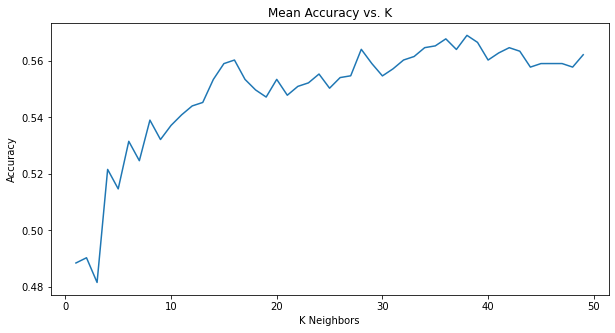

In [136]:
#Plotting list of mean accuracy to get better understanding of its relationship with k

plt.figure(figsize = (10,5))
plt.plot(range(1,50), acc)
plt.title('Mean Accuracy vs. K')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')

#Selecting k as 15 from the curve based on accuracy and stability

### Using the optimum k value in the model

In [137]:
knn = KNeighborsClassifier(n_neighbors=15) 
knn.fit(X_train,y_train)                    
y_pred_knn = knn.predict(X_test)  

### Accuracy Score Re-evaluation

In [138]:
acc_score_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy score of KNN classifier after finding optimum k is: ", acc_score_knn)
#Slight increase after finding optimum k

Accuracy score of KNN classifier after finding optimum k is:  0.5479166666666667


### Confusion Matrix

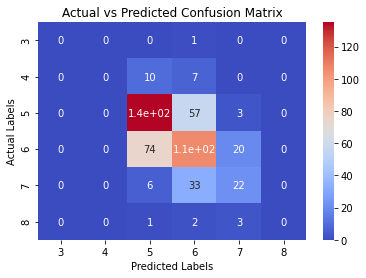

In [139]:
cm = confusion_matrix(y_test, y_pred_knn)
cm_df = pd.DataFrame(cm, index = ['3','4','5','6','7','8'], columns = ['3','4','5','6','7','8'])
ax = plt.subplot()
sns.heatmap(cm_df, annot = True, ax = ax,  cmap = 'coolwarm')
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("Actual Labels")
ax.set_title("Actual vs Predicted Confusion Matrix")
plt.show()

### Interpreting the confusion matrix

In [140]:
#For class 7

#True Positive = 22 # Correctly classified as positive
#False Positive = 3+20+3 = 26 # Missclassified as positive
#False Negative = 6+33 = 39 # Missclassified as Negative 
#True Negative = 1+10+7+140+57+74+110+1+2 = 402 # Correctly classified as Negative

# Recall = TP/FN+TP = 22/39+22 = 0.36
# Precision = TP/FP+TP = 22/26+22 = 0.45
# F1 Score = 2/(1/Precision + 1/Recall) = 0. 4
# Accuracy = TP+TN / TP+FP+FN+TN = 22+402/22+26+39+402 = 86.70% for class 7 with K Nearest Neighbor Model

### Classification Report

In [141]:
class_rep_knn = classification_report(y_test, y_pred_knn)
print("Classification report is: \n", class_rep_knn)

Classification report is: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.60      0.69      0.64       195
           6       0.51      0.53      0.52       200
           7       0.46      0.36      0.40        61
           8       0.00      0.00      0.00         6

    accuracy                           0.55       480
   macro avg       0.26      0.26      0.26       480
weighted avg       0.52      0.55      0.53       480



### AUC

In [142]:
predictions_prob_knn = knn.predict_proba(X_test)
print("AUC score with KNN model is: ", roc_auc_score(y_test, predictions_prob_knn, multi_class = "ovr"))

AUC score with KNN model is:  0.7009160700382284


# Logistic Regression Model

In [143]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

### Accuracy Score

In [144]:
# Evaluation
acc_score_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy score of Logistic Regression classifier for test data is: ", acc_score_lr)
#Accuracy of LR is higher than Naive Bayes & KNN

acc_score_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Accuracy score of Logistic Regression classifier for train data is: ", acc_score_lr_train)

# As the training data and testing data both have lower accuracies, it seems to be the case of underfitting

Accuracy score of Logistic Regression classifier for test data is:  0.5645833333333333
Accuracy score of Logistic Regression classifier for train data is:  0.6219839142091153


### Confusion Matrix

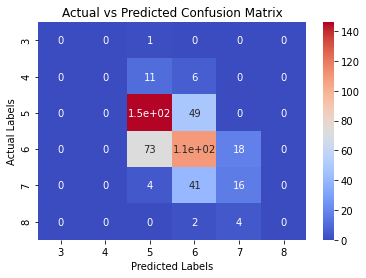

In [145]:
cm = confusion_matrix(y_test, y_pred_lr)
cm_df = pd.DataFrame(cm, index = ['3','4','5','6','7','8'], columns = ['3','4','5','6','7','8'])
ax = plt.subplot()
sns.heatmap(cm_df, annot = True, ax = ax,  cmap = 'coolwarm')
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("Actual Labels")
ax.set_title("Actual vs Predicted Confusion Matrix")
plt.show()

### Interpreting the confusion matrix

In [146]:
#For class 5

#True Positive = 150 # Correctly classified as positive
#False Positive = 1+11+73+4 = 89 # Missclassified as positive
#False Negative = 49 # Missclassified as Negative 
#True Negative = 6+110+18+41+16+2+4 = 197 # Correctly classified as Negative

# Recall = TP/FN+TP = 150/49+150 = 0.75
# Precision = TP/FP+TP = 150/89+150 = 0.62
# F1 Score = 2/(1/Precision + 1/Recall) = 0.67
# Accuracy = TP+TN / TP+FP+FN+TN = 150+197/150+89+49+197 = 71.5% for class 5 with Logistic Regression Model

### Classification Report

In [147]:
class_rep_lr = classification_report(y_test, y_pred_lr)
print("Classification report is: \n", class_rep_lr)

Classification report is: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.62      0.75      0.68       195
           6       0.53      0.55      0.54       200
           7       0.42      0.26      0.32        61
           8       0.00      0.00      0.00         6

    accuracy                           0.56       480
   macro avg       0.26      0.26      0.26       480
weighted avg       0.53      0.56      0.54       480



### AUC

In [148]:
predictions_prob_lr = lr.predict_proba(X_test)
print("AUC score with LR model is: ", roc_auc_score(y_test, predictions_prob_lr, multi_class = "ovr"))

AUC score with LR model is:  0.8385779155632734


### Reducing Multicollinearity

In [149]:
#Checking Multicollinearity after dropping fixed acidity, density, pH, sulphates, alcohol, free sulfur dioxide, volatile acidity
feat = df1[['citric acid', 'residual sugar',
       'chlorides', 'total sulfur dioxide']]
vif_data = pd.DataFrame()
vif_data["Feature"] = feat.columns
vif_data["VIF"] = [variance_inflation_factor(feat.values, i) for i in range(len(feat.columns))]
print(vif_data)

                Feature       VIF
0           citric acid  2.892174
1        residual sugar  3.612935
2             chlorides  3.452252
3  total sulfur dioxide  2.778654


### Dropping features with high VIF

In [150]:
#Removing features with high multicollinearity
df3 = df2_scaled_df.copy()
df3.drop(columns = ["fixed acidity", "density", "pH", "sulphates", "alcohol", "free sulfur dioxide", "volatile acidity"], 
         inplace = True)
df3

,citric acid,residual sugar,chlorides,total sulfur dioxide
0,-1.391472,-0.453218,-0.243707,-0.379133
1,-1.391472,0.043416,0.223875,0.624363
2,-1.186070,-0.169427,0.096353,0.229047
3,1.484154,-0.453218,-0.264960,0.411500
4,-1.391472,-0.453218,-0.243707,-0.379133
...,...,...,...,...
1594,-0.980669,-0.382271,0.053845,-0.075043
1595,-0.877968,-0.240375,-0.541259,0.137820
1596,-0.723916,-0.169427,-0.243707,-0.196679
1597,-0.775267,-0.382271,-0.264960,-0.075043


## Extracting features

In [151]:
#KNN with cross validation
X_sc_rmc = df2_scaled_df #RMC - Removed Multicollinearity
y_sc_rmc = df["quality"]

## Train Test Split

In [152]:
#Splitting the data into train test data set
X_train, X_test, y_train, y_test = train_test_split(X_sc_rmc, y_sc_rmc, test_size = 0.3, random_state = 42)

# KNN Model with reduced Multicollinearity

In [153]:
knn = KNeighborsClassifier(n_neighbors=3)   #Selecting Random k first
knn.fit(X_train,y_train)                    
y_pred_knn_rmc = knn.predict(X_test)  

### Accuracy Score - Initial Evaluation

In [154]:
acc_score_knn_rmc = accuracy_score(y_test, y_pred_knn_rmc)
print("Accuracy score of KNN classifier is: ", acc_score_knn_rmc)

Accuracy score of KNN classifier is:  0.5395833333333333


### Finding Correct K with the help of cross validation

In [155]:
acc = []
for i in range(1,50):    # Decided randomly, taking odd value 
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_score=cross_val_score(knn,X_sc_rmc,y_sc_rmc,cv=10)
    acc.append(cv_score.mean())
print("List of mean accuracy scores is for each iteration is: ", acc)

List of mean accuracy scores is for each iteration is:  [0.48848270440251573, 0.49033411949685535, 0.48159198113207546, 0.5216116352201258, 0.5147169811320754, 0.5315605345911949, 0.5246973270440252, 0.5390644654088049, 0.532193396226415, 0.537193396226415, 0.540935534591195, 0.5440880503144655, 0.5453223270440252, 0.5534591194968553, 0.5590723270440252, 0.5603380503144655, 0.5534748427672956, 0.5497484276729561, 0.5472327044025158, 0.5534944968553459, 0.5478773584905661, 0.5510141509433961, 0.552252358490566, 0.555381289308176, 0.5503655660377358, 0.5541312893081761, 0.5547562893081761, 0.5641352201257861, 0.5590880503144654, 0.5547209119496855, 0.5572130503144653, 0.5603459119496855, 0.5615880503144656, 0.5647209119496855, 0.5653459119496855, 0.5678341194968552, 0.5640841194968553, 0.5690762578616353, 0.5665880503144654, 0.5603341194968553, 0.5628419811320755, 0.5647091194968553, 0.5634630503144654, 0.5578341194968552, 0.5590841194968553, 0.5590919811320754, 0.5590919811320754, 0.557

### Plotting mean accuracy vs K for better visualization 

Text(0, 0.5, 'Accuracy')

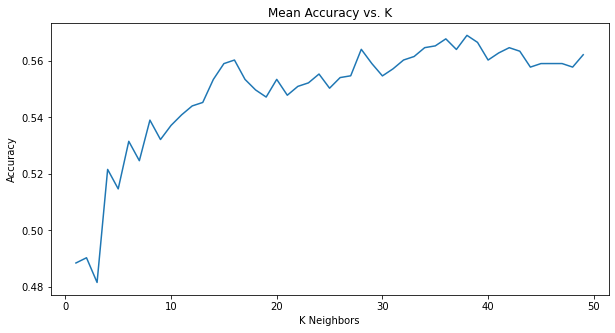

In [156]:
#Plotting list of mean accuracy to get better understanding of its relationship with k

plt.figure(figsize = (10,5))
plt.plot(range(1,50), acc)
plt.title('Mean Accuracy vs. K')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')

#Selecting k as  from the curve based on accuracy and stability

### Using the optimum k value in the model

In [157]:
knn = KNeighborsClassifier(n_neighbors=15) 
knn.fit(X_train,y_train)                    
y_pred_knn_rmc = knn.predict(X_test)  

### Accuracy Score Re-evaluation

In [158]:
acc_score_knn_rmc = accuracy_score(y_test, y_pred_knn_rmc)
print("Accuracy score of KNN classifier after finding optimum k is: ", acc_score_knn_rmc)
#Slight increase in accuracy after finding optimum k

# No change in prediction accuracy for training and testing dataset is observed even after reducing Multicollinearity. 
#Hence, it can be concluded that multicollinearity does not affect prediction accuracy

# As the training data and testing data both have lower accuracies, it seems to be the case of underfitting

Accuracy score of KNN classifier after finding optimum k is:  0.5479166666666667


### Classification Report

In [159]:
class_rep_knn_rmc = classification_report(y_test, y_pred_knn_rmc)
print("Classification report is: \n", class_rep_knn_rmc)
# No change in classification report is observed after reducing Multicollinearity.

Classification report is: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.60      0.69      0.64       195
           6       0.51      0.53      0.52       200
           7       0.46      0.36      0.40        61
           8       0.00      0.00      0.00         6

    accuracy                           0.55       480
   macro avg       0.26      0.26      0.26       480
weighted avg       0.52      0.55      0.53       480



### AUC

In [160]:
predictions_prob_knn_rmc = knn.predict_proba(X_test)
print("AUC score with KNN model is after reducing multicollinearity is: "
      , roc_auc_score(y_test, predictions_prob_knn_rmc, multi_class = "ovr"))
#No change in AUC is observed after reducing Multicollinearity when compared to previous KNN model

AUC score with KNN model is after reducing multicollinearity is:  0.7009160700382284


# Logistic Regression with reduced Multicollinearity

In [161]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr_rmc = lr.predict(X_test)
y_pred_lr_rmc_train = lr.predict(X_train)

### Accuracy Score

In [162]:
# Evaluation
acc_score_lr_rmc = accuracy_score(y_test, y_pred_lr_rmc)
print("""Accuracy score of Logistic Regression classifier for test data after reducing 
      multicollinearity is: """, acc_score_lr_rmc)

acc_score_lr_train_rmc = accuracy_score(y_train, y_pred_lr_rmc_train)
print("""Accuracy score of Logistic Regression classifier for train data after reducing 
      multicollinearity is: """, acc_score_lr_train_rmc)
#Accuracy of LR is higher than Naive Bayes & KNN

# No change in prediction accuracy for training and testing dataset is observed even after reducing Multicollinearity. 
#Hence, it can be concluded that multicollinearity does not affect prediction accuracy

# As the training data and testing data both have lower accuracies, it seems to be the case of underfitting

Accuracy score of Logistic Regression classifier for test data after reducing 
      multicollinearity is:  0.5645833333333333
Accuracy score of Logistic Regression classifier for train data after reducing 
      multicollinearity is:  0.6219839142091153


### Classification Report

In [163]:
class_rep_lr_rmc = classification_report(y_test, y_pred_lr_rmc)
print("Classification report is: \n", class_rep_lr_rmc)
# No change in classification report for training and testing dataset is observed even after reducing Multicollinearity.

Classification report is: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.62      0.75      0.68       195
           6       0.53      0.55      0.54       200
           7       0.42      0.26      0.32        61
           8       0.00      0.00      0.00         6

    accuracy                           0.56       480
   macro avg       0.26      0.26      0.26       480
weighted avg       0.53      0.56      0.54       480



### AUC

In [164]:
predictions_prob_lr_rmc = lr.predict_proba(X_test)
print("AUC score with LR model is after reducing multicollinearity is: "
      , roc_auc_score(y_test, predictions_prob_lr_rmc, multi_class = "ovr"))
#No change in AUC is observed after reducing Multicollinearity when compared to previous LR model

AUC score with LR model is after reducing multicollinearity is:  0.8385779155632734


# Conclusions

In [165]:
# No missing values found in the dataset

# Since, we want to have extreme values of target variable in the model for better efficiency, hence we shall include outliers
# for this multiclassified dataset 

# Accuracy of Random forest is highest (62%) followed by Decision Tree (59%)
# Accuracy of Logistic Regression (56%), KNN (55%) and Naive Bayes (54%) are closer and in descending order
# Random State (to ensure reproducability) and train test split affect the accuracy of the models
# Hyperparameters in Decision Tree and Random Forest, distribution of classes also affect the accuracy of the models

# Multicollinearity does not have impact on Accuracy and Evaluation Metrics (Precision, Recall, AUC, f1 score)  
# of Logistic Regression & KNN models
# Decision Tree, Random Forest and Naive Bayes Models are immune to Multicollinearity

# Slight difference is observed in manual calculations of Precision, Recall, f1 scores obtained from confusion matrix and from
# classification report (in 2nd decimal places)

# Standard Scaling is done for KNN and Logistic Regression Models since they are distance based

# Area under the curve for Random Forest and Logistic Regression are the highest (83%) followed by Naive Bayes (82%)
# Area under the curve for KNN is 70% and least in Decision Tree (66%)

# As classes are unequally distributed Weighted average will be considered to evaluate the metrics.
# Weighted average (0.59) and macro average (0.29) of f1 score is highest in Random Forest. Hence, Random forest is the best 
# model for this dataset

# Weighted average (0.54) of f1 score is equal for Logistic Regression and Naive Bayes model. However, macro average of 
# f1 score for LR (0.26) is least followed by Naive Bayes (0.29). Hence, we can say that Logistic regression is least suitable 
# for this dataset

# As checked in KNN and LR models, testing accuracy is lower than training accuracy which is good. However, accuracy
# in both train and test datasets are low. Hence, this seems the case of underfitting

# Since NB is a probabilistic classifier, it also considered classification of target variable (quality) in class 4 
# (with 93.77% accuracy) and no other classifiers have done that 


# Accuracy comparison for class 5 classification - 71.5% from Logistic Regression and 72.32% from Decision Tree Model. Decision
# Tree is slightly better classifier as compared to Logistic Regression with refernce to this example

# Thanks Amrita Madam!